In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0


In [ ]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/My Drive/Bangkit_Final_Project/makeup_images.zip'

In [ ]:

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## USE OPEN_CV TO EXTRACT FACES FROM DATASET
Resources:
Using this tutorial instead: 
https://towardsdatascience.com/extracting-faces-using-opencv-face-detection-neural-network-475c5cd0c260

Download here: https://github.com/vinuvish/Face-detection-with-OpenCV-and-deep-learning


In [ ]:
import os
import cv2
import numpy as np

In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
__file__ = "/content/drive/My Drive/Bangkit_Final_Project/"

In [ ]:
# Define Model Paths
base_dir = os.path.dirname(__file__)
prototxt_path = os.path.join(base_dir + '/deploy.prototxt')
caffemodel_path = os.path.join(base_dir + '/weights.caffemodel')

# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

### MAKEUP

In [ ]:
updated_images_dir = '/content/updated_images_mu'#no/' #'/content/updated_images_mu/' #__file__+'updated_images/'
faces_dir = '/content/faces_mu/' #no/' #'/content/faces_mu/' #__file__+'faces/'
print(updated_images_dir)
print(faces_dir)

/content/updated_images_mu
/content/faces_mu/


In [ ]:
# Create directory 'updated_images' if it does not exist
if not os.path.exists(updated_images_dir):
	print("New directory created")
	os.makedirs(updated_images_dir)

New directory created


In [ ]:
# Create directory 'faces' if it does not exist
if not os.path.exists(faces_dir): #('faces'):
	print("New directory created")
	os.makedirs(faces_dir) #('faces')

New directory created


In [ ]:
image_folder = "/content/data/makeup/"

In [ ]:
thres = 0.3

In [ ]:
ocv_img_size = (300, 300)

In [ ]:
# Loop through all images and save images with marked faces
for file in os.listdir(image_folder):
  file_name, file_extension = os.path.splitext(file)
  if (file_extension in ['.png','.jpg', '.jpeg']):
    print("Image path: {}".format(image_folder+file))
    image = cv2.imread(image_folder+file) #Detect Face
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, ocv_img_size), 1.0, ocv_img_size, (104.0, 177.0, 123.0))

    model.setInput(blob)
    detections = model.forward()

    """"
    for i in range(0, detections.shape[2]): # Create frame around face
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      confidence = detections[0, 0, i, 2]

      # If confidence > 0.5, show box around face
      if (confidence > 0.5):
        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)
      if not cv2.imwrite(updated_images_dir + file, image):
        raise Exception("Could not write image") #(base_dir + 'updated_images/' + file, image)
      print("Image " + file + " converted successfully")
    """""
    print("DETECTIONS")
    print(detections)
    for i in range(0, detections.shape[2]): # Extracting Faces
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      confidence = detections[0, 0, i, 2]
      count = 0
      # If confidence > 0.5, save it as a separate file
      if (confidence > thres): #0.5):
        count += 1
        print("i: "+str(i))
        print("IMAGE EMPTY?")
        print(image)
        #if image.empty() == False:
        frame = image[startY:endY, startX:endX]
        print("FRAME")
        print(frame)
        #print(len(frame) != 0)
        #print(len(frame) == 0)
        if len(frame) == 0:
          print("FRAME IS EMPTYYYY")
        if len(frame) != 0 and (frame.shape[0] != 0 and frame.shape[1] != 0 and frame.shape[2] != 0):
          print("FRAME IS NOT EMPTY")
          print(frame)
          print("LENGTH")
          print(len(frame))
          print(frame[0])
          print(len(frame[0]))
          print("SHAPE")
          print(frame.shape)
          print(frame.shape[1])
          #print(frame.shape[1])
          print(file)
          if not cv2.imwrite(faces_dir + str(i) + '_' + file, frame):
            raise Exception("Could not write extracted image")
          print("Extracted image written "+file)



Streaming output truncated to the last 5000 lines.
 [164 176 216]
 [164 176 218]
 [162 174 216]
 [157 170 214]
 [154 170 213]
 [149 166 209]
 [145 167 209]
 [141 166 210]
 [137 166 210]
 [132 165 210]
 [129 166 210]
 [128 165 209]
 [126 165 210]
 [122 160 208]
 [123 160 210]
 [124 161 211]
 [124 161 211]
 [123 160 212]
 [119 156 208]
 [114 153 205]
 [111 150 202]
 [107 147 200]
 [106 146 199]
 [105 144 199]
 [104 143 198]
 [100 141 196]
 [ 99 140 195]
 [ 97 138 193]
 [ 99 139 192]
 [ 99 138 190]
 [100 137 187]
 [ 99 134 184]
 [ 96 131 181]
 [ 95 128 178]
 [ 93 124 175]
 [ 92 122 171]
 [ 93 120 170]
 [ 90 116 163]
 [ 90 113 161]
 [ 87 109 157]
 [ 82 104 152]
 [ 79  99 146]
 [ 76  94 141]
 [ 75  91 138]
 [ 73  89 135]
 [ 57  74 113]
 [ 56  73 106]
 [ 55  68 100]
 [ 51  62  90]
 [ 47  54  79]
 [ 43  49  68]
 [ 44  44  60]
 [ 42  42  54]
 [ 38  37  46]
 [ 42  40  46]
 [ 48  46  52]
 [ 52  52  58]
 [ 49  51  59]
 [ 45  47  55]
 [ 43  45  55]
 [ 47  49  60]
 [ 58  58  72]
 [ 53  52  68]
 [ 5

## NO MAKEUP

In [ ]:
updated_images_dir = '/content/updated_images_no'#no/' #'/content/updated_images_mu/' #__file__+'updated_images/'
faces_dir = '/content/faces_no/' #no/' #'/content/faces_mu/' #__file__+'faces/'
print(updated_images_dir)
print(faces_dir)

/content/updated_images_no
/content/faces_no/


In [ ]:
# Create directory 'updated_images' if it does not exist
if not os.path.exists(updated_images_dir):
	print("New directory created")
	os.makedirs(updated_images_dir)

New directory created


In [ ]:
# Create directory 'faces' if it does not exist
if not os.path.exists(faces_dir): #('faces'):
	print("New directory created")
	os.makedirs(faces_dir) #('faces')

New directory created


In [ ]:
image_folder = "/content/data/no_makeup/"

In [ ]:
# Loop through all images and save images with marked faces
for file in os.listdir(image_folder):
  file_name, file_extension = os.path.splitext(file)
  if (file_extension in ['.png','.jpg', '.jpeg']):
    print("Image path: {}".format(image_folder+file))
    image = cv2.imread(image_folder+file) #Detect Face
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, ocv_img_size), 1.0, ocv_img_size, (104.0, 177.0, 123.0))

    model.setInput(blob)
    detections = model.forward()

    """"
    for i in range(0, detections.shape[2]): # Create frame around face
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      confidence = detections[0, 0, i, 2]

      # If confidence > 0.5, show box around face
      if (confidence > 0.5):
        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)
      if not cv2.imwrite(updated_images_dir + file, image):
        raise Exception("Could not write image") #(base_dir + 'updated_images/' + file, image)
      print("Image " + file + " converted successfully")
    """""
    print("DETECTIONS")
    print(detections)
    for i in range(0, detections.shape[2]): # Extracting Faces
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      confidence = detections[0, 0, i, 2]
      count = 0
      # If confidence > 0.5, save it as a separate file
      if (confidence > thres): # 0.5):
        count += 1
        print("i: "+str(i))
        print("IMAGE EMPTY?")
        print(image)
        #if image.empty() == False:
        frame = image[startY:endY, startX:endX]
        print("FRAME")
        print(frame)
        #print(len(frame) != 0)
        #print(len(frame) == 0)
        if len(frame) == 0:
          print("FRAME IS EMPTYYYY")
        if len(frame) != 0 and (frame.shape[0] != 0 and frame.shape[1] != 0 and frame.shape[2] != 0):
          print("FRAME IS NOT EMPTY")
          print(frame)
          print("LENGTH")
          print(len(frame))
          print(frame[0])
          print(len(frame[0]))
          print("SHAPE")
          print(frame.shape)
          print(frame.shape[1])
          #print(frame.shape[1])
          print(file)
          if not cv2.imwrite(faces_dir + str(i) + '_' + file, frame):
            raise Exception("Could not write extracted image")
          print("Extracted image written "+file)



Streaming output truncated to the last 5000 lines.
FRAME IS NOT EMPTY
[[[137 140 138]
  [146 147 145]
  [139 141 141]
  ...
  [133 128 125]
  [145 139 134]
  [146 140 133]]

 [[129 134 132]
  [117 122 120]
  [ 93  99  98]
  ...
  [150 147 143]
  [145 141 136]
  [146 140 133]]

 [[132 137 135]
  [107 112 110]
  [ 88  93  92]
  ...
  [137 134 130]
  [159 155 150]
  [152 146 139]]

 ...

 [[147 144 136]
  [147 144 136]
  [147 145 135]
  ...
  [147 144 136]
  [147 144 136]
  [147 144 136]]

 [[147 144 136]
  [147 144 136]
  [147 145 135]
  ...
  [147 144 136]
  [147 144 136]
  [147 144 136]]

 [[147 144 136]
  [147 144 136]
  [147 145 135]
  ...
  [147 144 136]
  [147 144 136]
  [147 144 136]]]
LENGTH
150
[[137 140 138]
 [146 147 145]
 [139 141 141]
 [ 86  91  94]
 [ 45  51  56]
 [ 28  34  39]
 [ 41  47  52]
 [ 60  68  75]
 [ 58  66  73]
 [ 36  44  51]
 [ 29  36  45]
 [ 32  41  50]
 [ 35  44  54]
 [ 40  49  59]
 [ 35  44  54]
 [ 14  22  35]
 [  0   2  15]
 [  0   4  17]
 [  9  18  32]
 [ 1

## Use the Modified DataSet

In [ ]:

try:
    #YOUR CODE GOES HERE
    #cur_dir = f"{getcwd()}/../"
    #print(cur_dir)
    #base_dir = f"{getcwd()}/../tmp/cats-v-dogs/"
    base_dir = "/content/m_or_nom_5/"

    print(base_dir)
    os.makedirs(base_dir)
    print(len(os.listdir(base_dir)))
    print("that")
    train_dir = os.path.join(base_dir, 'training')
    validation_dir = os.path.join(base_dir, 'testing')
    
    train_m_dir = os.path.join(train_dir, 'makeup')
    train_nom_dir = os.path.join(train_dir, 'no_makeup')
    
    validation_m_dir = os.path.join(validation_dir, 'makeup')
    validation_nom_dir = os.path.join(validation_dir, 'no_makeup')
    
    os.makedirs(train_m_dir)
    os.makedirs(train_nom_dir)
    os.makedirs(validation_m_dir)
    os.makedirs(validation_nom_dir)
    # Testing:
    train_m_fnames = os.listdir(train_m_dir)
    print("PRINTING")
    print(train_m_fnames) #[:10])
except OSError:
    print("ERROR")
    print(OSError)
    pass

/content/m_or_nom_5/
0
that
PRINTING
[]


In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    print("SPLITTING DATA")
    if os.path.getsize(SOURCE) == 0:
        print("FILE SIZE 0 ERROR")
        return 0
    else:
        source_data = os.listdir(SOURCE)
        source_len = len(source_data)
        print("SOURCE LENGTH: "+str(source_len))
        print(source_data[:3])
        #print(len(source_data))
        train_end = source_len*90//100
        print("train end")
        print(train_end)
        source_data = random.sample(source_data, len(source_data))
        train_fname = source_data[:train_end]
        test_fname = source_data[train_end:]
        for fname in train_fname:  
            print(fname)
            print(SOURCE+fname) #(os.path.join(SOURCE, fname))
            copyfile(SOURCE+fname, TRAINING+fname)
        for fname in test_fname:   
            copyfile(SOURCE+fname, TESTING+fname)
        #copyfile(SOURCE, os.path(TESTING))
        

    #print(os.listdir(SOURCE))
# YOUR CODE ENDS HERE


In [ ]:

M_SOURCE_DIR = '/content/faces_mu/'
TRAINING_M_DIR = '/content/m_or_nom_5/training/makeup/'
TESTING_M_DIR = '/content/m_or_nom_5/testing/makeup/'
NOM_SOURCE_DIR = '/content/faces_no/'
TRAINING_NOM_DIR = '/content/m_or_nom_5/training/no_makeup/'
TESTING_NOM_DIR = '/content/m_or_nom_5/testing/no_makeup/'

split_size = .9
split_data(M_SOURCE_DIR, TRAINING_M_DIR, TESTING_M_DIR, split_size)
split_data(NOM_SOURCE_DIR, TRAINING_NOM_DIR, TESTING_NOM_DIR, split_size)

SPLITTING DATA
SOURCE LENGTH: 1849
['2_makeup1020.jpeg', '1_makeup338.jpeg', '0_makeup638.jpeg']
train end
1664
0_makeup625.jpeg
/content/faces_mu/0_makeup625.jpeg
0_makeup194.jpeg
/content/faces_mu/0_makeup194.jpeg
0_makeup813.jpeg
/content/faces_mu/0_makeup813.jpeg
0_makeup375.jpeg
/content/faces_mu/0_makeup375.jpeg
1_makeup1017.jpeg
/content/faces_mu/1_makeup1017.jpeg
0_makeup295.jpeg
/content/faces_mu/0_makeup295.jpeg
0_makeup802.jpeg
/content/faces_mu/0_makeup802.jpeg
3_makeup152.jpeg
/content/faces_mu/3_makeup152.jpeg
1_makeup916.jpeg
/content/faces_mu/1_makeup916.jpeg
6_makeup1218.jpeg
/content/faces_mu/6_makeup1218.jpeg
0_makeup374.jpeg
/content/faces_mu/0_makeup374.jpeg
0_makeup152.jpeg
/content/faces_mu/0_makeup152.jpeg
3_makeup310.jpeg
/content/faces_mu/3_makeup310.jpeg
0_makeup1059.jpeg
/content/faces_mu/0_makeup1059.jpeg
0_makeup289.jpeg
/content/faces_mu/0_makeup289.jpeg
2_makeup422.jpeg
/content/faces_mu/2_makeup422.jpeg
0_makeup346.jpeg
/content/faces_mu/0_makeup346.jpe

In [ ]:
# REGITA'S DATA GENERATOR
TRAINING_DIR = "/content/m_or_nom_5/training/" #YOUR CODE HERE
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.5, #THIS
    height_shift_range=0.5, #THIS
    shear_range=0.5, #THIS
    zoom_range=0.5, #THIS
    horizontal_flip=True,
    fill_mode='nearest'
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size= (150, 150),
    batch_size=100, #THIS
    class_mode='binary'
)
#YOUR CODE HERE

VALIDATION_DIR = "/content/m_or_nom_5/testing/" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.5, #THIS
    height_shift_range=0.5, #THIS
    shear_range=0.5, #THIS
    zoom_range=0.5, #THIS
    horizontal_flip=True,
    fill_mode='nearest'
) #YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)#YOUR CODE HERE



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2295 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## MOBILENETV2

In [ ]:
IMG_SHAPE =(150, 150, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

## WITHOUT BASE MODEL

In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                          input_shape=(300, 300,3)), #(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS

model_3 = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                          input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.summary()

opt = SGD(lr=0.01)

model_3.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=opt)

In [ ]:
history_3 = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS

model_4 = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                          input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.summary()

opt = SGD(lr=0.01)

model_4.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

In [ ]:
history_4 = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


WITH BASE MODEL

In [ ]:
model_1 = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_1.summary()

model_1.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc']) #0.001

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          368672    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 2,644,065
Trainable params: 386,081
Non-trainable params: 2,257,984
______________________________________

In [ ]:
history_1 = model_1.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 51s 2s/step - loss: 0.5933 - acc: 0.7168 - val_loss: 0.5745 - val_acc: 0.7227
Epoch 2/10
23/23 [==============================] - 50s 2s/step - loss: 0.5704 - acc: 0.7237 - val_loss: 0.5637 - val_acc: 0.7266
Epoch 3/10
23/23 [==============================] - 50s 2s/step - loss: 0.5647 - acc: 0.7251 - val_loss: 0.5637 - val_acc: 0.7227
Epoch 4/10
23/23 [==============================] - 51s 2s/step - loss: 0.5678 - acc: 0.7229 - val_loss: 0.5906 - val_acc: 0.7227
Epoch 5/10
23/23 [==============================] - 51s 2s/step - loss: 0.5606 - acc: 0.7211 - val_loss: 0.5701 - val_acc: 0.6953
Epoch 6/10
23/23 [==============================] - 51s 2s/step - loss: 0.5545 - acc: 0.7298 - val_loss: 0.5519 - val_acc: 0.7188
Epoch 7/10
23/23 [==============================] - 51s 2s/step - loss: 0.5505 - acc: 0.7281 - val_loss: 0.5734 - val_acc: 0.7227
Epoch 8/10
23/23 [==============================] - 50s 2s/step - loss: 0.5533 - acc: 0.71

In [ ]:
model_2 = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_2.summary()

model_2.compile(optimizer=RMSprop(lr=0.00005), loss='binary_crossentropy', metrics=['acc']) #0.001

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          368672    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 2,644,065
Trainable params: 386,081
Non-trainable params: 2,257,984
______________________________________

In [ ]:
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.


In [ ]:
plot_model(model_2, to_file='model_2_final_plot.png') #, show_shapes=True, show_layer_names=True)

TypeError: ignored

In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 51s 2s/step - loss: 0.6107 - acc: 0.7163 - val_loss: 0.5882 - val_acc: 0.7227
Epoch 2/10
23/23 [==============================] - 50s 2s/step - loss: 0.5816 - acc: 0.7237 - val_loss: 0.5701 - val_acc: 0.7227
Epoch 3/10
23/23 [==============================] - 50s 2s/step - loss: 0.5709 - acc: 0.7251 - val_loss: 0.5650 - val_acc: 0.7227
Epoch 4/10
23/23 [==============================] - 50s 2s/step - loss: 0.5647 - acc: 0.7190 - val_loss: 0.5679 - val_acc: 0.7188
Epoch 5/10
23/23 [==============================] - 50s 2s/step - loss: 0.5642 - acc: 0.7246 - val_loss: 0.5531 - val_acc: 0.7266
Epoch 6/10
23/23 [==============================] - 50s 2s/step - loss: 0.5591 - acc: 0.7272 - val_loss: 0.5572 - val_acc: 0.7227
Epoch 7/10
23/23 [==============================] - 50s 2s/step - loss: 0.5583 - acc: 0.7224 - val_loss: 0.5576 - val_acc: 0.7266
Epoch 8/10
23/23 [==============================] - 50s 2s/step - loss: 0.5599 - acc: 0.72

In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/2
23/23 [==============================] - 50s 2s/step - loss: 0.5546 - acc: 0.7281 - val_loss: 0.5521 - val_acc: 0.7305
Epoch 2/2
23/23 [==============================] - 50s 2s/step - loss: 0.5513 - acc: 0.7264 - val_loss: 0.5523 - val_acc: 0.7227


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 50s 2s/step - loss: 0.5472 - acc: 0.7268 - val_loss: 0.5460 - val_acc: 0.7305


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 50s 2s/step - loss: 0.5440 - acc: 0.7290 - val_loss: 0.5516 - val_acc: 0.7266


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 51s 2s/step - loss: 0.5388 - acc: 0.7303 - val_loss: 0.5402 - val_acc: 0.7227


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 51s 2s/step - loss: 0.5329 - acc: 0.7416 - val_loss: 0.5512 - val_acc: 0.7227


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 51s 2s/step - loss: 0.5529 - acc: 0.7251 - val_loss: 0.5450 - val_acc: 0.7305


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 51s 2s/step - loss: 0.5498 - acc: 0.7242 - val_loss: 0.5616 - val_acc: 0.7227


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 50s 2s/step - loss: 0.5378 - acc: 0.7298 - val_loss: 0.5310 - val_acc: 0.7188


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)


23/23 [==============================] - 51s 2s/step - loss: 0.5413 - acc: 0.7285 - val_loss: 0.5140 - val_acc: 0.7539


In [ ]:
history_2

In [ ]:
model_3 = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_3.summary()

model_3.compile(optimizer=RMSprop(lr=0.00005), loss='binary_crossentropy', metrics=['acc']) #0.001

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 32)          368672    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 2,644,065
Trainable params: 386,081
Non-trainable params: 2,257,984
______________________________________

In [ ]:
history_3 = model_3.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/20
23/23 [==============================] - 54s 2s/step - loss: 0.6111 - acc: 0.6980 - val_loss: 0.5848 - val_acc: 0.7266
Epoch 2/20
23/23 [==============================] - 50s 2s/step - loss: 0.5869 - acc: 0.7194 - val_loss: 0.5604 - val_acc: 0.7188
Epoch 3/20
23/23 [==============================] - 50s 2s/step - loss: 0.5685 - acc: 0.7224 - val_loss: 0.5626 - val_acc: 0.7383
Epoch 4/20
23/23 [==============================] - 50s 2s/step - loss: 0.5667 - acc: 0.7255 - val_loss: 0.5661 - val_acc: 0.7227
Epoch 5/20
23/23 [==============================] - 50s 2s/step - loss: 0.5558 - acc: 0.7259 - val_loss: 0.5556 - val_acc: 0.7383
Epoch 6/20
23/23 [==============================] - 50s 2s/step - loss: 0.5670 - acc: 0.7224 - val_loss: 0.5646 - val_acc: 0.7266
Epoch 7/20
23/23 [==============================] - 49s 2s/step - loss: 0.5630 - acc: 0.7216 - val_loss: 0.5557 - val_acc: 0.7188
Epoch 8/20
23/23 [==============================] - 50s 2s/step - loss: 0.5573 - acc: 0.72

acc
[0.6980392336845398, 0.7193899750709534, 0.7224400639533997, 0.7254902124404907, 0.7259259223937988, 0.7224400639533997, 0.7215686440467834, 0.7202614545822144, 0.7189542651176453, 0.7246187329292297, 0.7241830229759216, 0.7237472534179688, 0.7289760112762451, 0.7281045913696289, 0.7263616323471069, 0.7241830229759216, 0.727668821811676, 0.7355119585990906, 0.7263616323471069, 0.7281045913696289]


Text(0.5, 1.0, 'Training and validation loss')

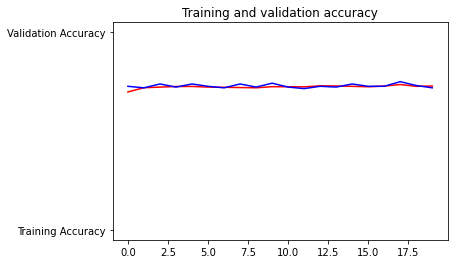

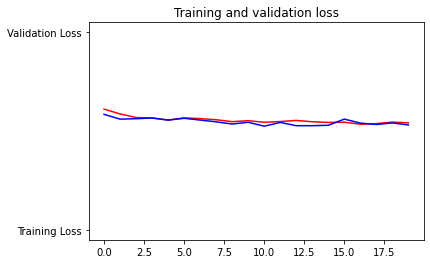

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_3.history['acc']
val_acc=history_3.history['val_acc']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']
print("acc")
print(acc)

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
local_drive = '/content/drive/My Drive/Bangkit_Final_Project/'

In [ ]:
# Saving the TEST Model
model_2.save(local_drive+'makeup_test_model_2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Bangkit_Final_Project/makeup_test_model_2/assets


In [ ]:
# TFLITE
converter = tf.lite.TFLiteConverter.from_saved_model(local_drive+'makeup_test_model_2')
tflite_model = converter.convert()
open(local_drive+"converted_makeup_model_2.tflite", "wb").write(tflite_model)

10394252

In [ ]:
# following: https://analyticsindiamag.com/a-practical-guide-to-implement-transfer-learning-in-tensorflow/
model_6 = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_6.summary()

model_6.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history_6 = model_6.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 50s 2s/step - loss: 0.6882 - acc: 0.6671 - val_loss: 0.7085 - val_acc: 0.6289
Epoch 2/10
23/23 [==============================] - 49s 2s/step - loss: 0.6751 - acc: 0.6767 - val_loss: 0.6752 - val_acc: 0.6797
Epoch 3/10
23/23 [==============================] - 49s 2s/step - loss: 0.6607 - acc: 0.6802 - val_loss: 0.6341 - val_acc: 0.6641
Epoch 4/10
23/23 [==============================] - 49s 2s/step - loss: 0.6597 - acc: 0.6828 - val_loss: 0.6568 - val_acc: 0.6758
Epoch 5/10
23/23 [==============================] - 49s 2s/step - loss: 0.6428 - acc: 0.6832 - val_loss: 0.6401 - val_acc: 0.6953
Epoch 6/10
23/23 [==============================] - 49s 2s/step - loss: 0.6395 - acc: 0.6880 - val_loss: 0.6494 - val_acc: 0.6797
Epoch 7/10
23/23 [==============================] - 49s 2s/step - loss: 0.6371 - acc: 0.6871 - val_loss: 0.6233 - val_acc: 0.6797
Epoch 8/10
23/23 [==============================] - 49s 2s/step - loss: 0.6172 - acc: 0.69

In [ ]:
history_6 = model_6.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 49s 2s/step - loss: 0.6098 - acc: 0.6985 - val_loss: 0.5937 - val_acc: 0.7148
Epoch 2/10
23/23 [==============================] - 49s 2s/step - loss: 0.6239 - acc: 0.6989 - val_loss: 0.5961 - val_acc: 0.6875
Epoch 3/10
23/23 [==============================] - 49s 2s/step - loss: 0.6128 - acc: 0.6924 - val_loss: 0.5936 - val_acc: 0.7031
Epoch 4/10
23/23 [==============================] - 49s 2s/step - loss: 0.6106 - acc: 0.7041 - val_loss: 0.6037 - val_acc: 0.6953
Epoch 5/10
23/23 [==============================] - 49s 2s/step - loss: 0.6154 - acc: 0.7015 - val_loss: 0.5982 - val_acc: 0.7031
Epoch 6/10
23/23 [==============================] - 49s 2s/step - loss: 0.6044 - acc: 0.7002 - val_loss: 0.5992 - val_acc: 0.7148
Epoch 7/10
23/23 [==============================] - 49s 2s/step - loss: 0.6005 - acc: 0.7072 - val_loss: 0.5920 - val_acc: 0.7148
Epoch 8/10
23/23 [==============================] - 49s 2s/step - loss: 0.6062 - acc: 0.70

In [ ]:
# following: https://analyticsindiamag.com/a-practical-guide-to-implement-transfer-learning-in-tensorflow/
model_7 = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_7.summary()

model_7.compile(optimizer=RMSprop(lr=0.00005), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               655872    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 2,914,369
Trainable params: 656,385
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history_7 = model_7.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 49s 2s/step - loss: 0.6272 - acc: 0.6889 - val_loss: 0.5885 - val_acc: 0.6953
Epoch 2/10
23/23 [==============================] - 49s 2s/step - loss: 0.5708 - acc: 0.7259 - val_loss: 0.5469 - val_acc: 0.7227
Epoch 3/10
23/23 [==============================] - 53s 2s/step - loss: 0.5615 - acc: 0.7207 - val_loss: 0.5747 - val_acc: 0.7188
Epoch 4/10
23/23 [==============================] - 49s 2s/step - loss: 0.5774 - acc: 0.7063 - val_loss: 0.5251 - val_acc: 0.7383
Epoch 5/10
23/23 [==============================] - 49s 2s/step - loss: 0.5684 - acc: 0.7190 - val_loss: 0.5605 - val_acc: 0.7188
Epoch 6/10
23/23 [==============================] - 49s 2s/step - loss: 0.5654 - acc: 0.7176 - val_loss: 0.5580 - val_acc: 0.7266
Epoch 7/10
23/23 [==============================] - 49s 2s/step - loss: 0.5627 - acc: 0.7251 - val_loss: 0.5781 - val_acc: 0.7109
Epoch 8/10
23/23 [==============================] - 49s 2s/step - loss: 0.5521 - acc: 0.72

In [ ]:

# following: https://analyticsindiamag.com/a-practical-guide-to-implement-transfer-learning-in-tensorflow/
model_7 = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_7.summary()

model_7.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

## Deploying MAKE UP 2 MODEL

In [ ]:
# Storing model in Firebase Storage
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
if (not len(firebase_admin._apps)):
	cred = credentials.Certificate(r'/content/drive/My Drive/Bangkit_Final_Project/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json')
 #(r'service_account.json')
	firebase_admin.initialize_app(
    cred,
    options={
      'storageBucket': 'gs://bangkit-makeup.appspot.com',
  })
db = firestore.client()

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
model_2_loaded = tf.keras.models.load_model(local_drive+'makeup_test_model_2')

In [ ]:
model_2_loaded.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          368672    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 2,644,065
Trainable params: 2,609,953
Non-trainable params: 34,112
_______________________________________

In [ ]:
CLOUD_PROJECT = 'bangkit-makeup'
BUCKET = 'gs://bangkit-makeup.appspot.com'

In [ ]:
!gcloud config set project $CLOUD_PROJECT

Updated property [core/project].


In [ ]:
model_2_loaded.save(BUCKET+'/bangkit_model_final/makeup_model_v2/', save_format='tf')

INFO:tensorflow:Assets written to: gs://bangkit-makeup.appspot.com/bangkit_model_final/makeup_model_v2/assets


INFO:tensorflow:Assets written to: gs://bangkit-makeup.appspot.com/bangkit_model_final/makeup_model_v2/assets


In [ ]:
MODEL = 'bangkit_model_final_v2' #'bm_model_trial_1'
!gcloud ai-platform models create $MODEL


Learn more about regional endpoints and see a list of available regions: https://cloud.google.com/ai-platform/prediction/docs/regional-endpoints
Created ml engine model [projects/bangkit-makeup/models/bangkit_model_final_v2].


In [ ]:
VERSION = 'v2'
MODEL_DIR = BUCKET+'/bangkit_model_final/makeup_model_v2/'

In [ ]:
!gcloud ai-platform versions create $VERSION \
--model $MODEL \
--origin $MODEL_DIR \
--runtime-version=2.1 \
--python-version=3.7

In [ ]:
!gcloud auth application-default print-access-token

ya29.a0AfH6SMBBv1fR6o8cTTtLxHaOJbQgWY3EvNhNBiWaFLZazyfMuUrlmrSt-I_IzG7EtI9CTk7y1AwwhLHd3PhiW9acrC-75EcDhPX1etd93mmBckOV55TUXJ9YGep4efHodoSPjydaWIjzHAWrxZ8AWy1O_jkBNdbCER35lH2qyp8


In [ ]:
model_6

In [ ]:
local_drive = '/content/drive/My Drive/Bangkit_Final_Project/'

In [ ]:
# Saving the TEST Model
model_6.save(local_drive+'makeup_test_model_6')

In [ ]:
# TFLITE
converter = tf.lite.TFLiteConverter.from_saved_model(local_drive+'makeup_test_model_6')
tflite_model = converter.convert()
open(local_drive+"converted_makeup_model_6.tflite", "wb").write(tflite_model)

## TESTING MODEL 2

106496/100148 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

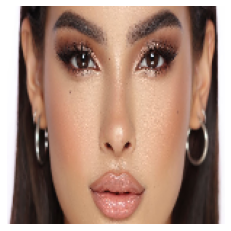

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

file = tf.keras.utils.get_file(
    "test_file.jpeg",
    "https://i.ytimg.com/vi/1thjXzmblyI/maxresdefault.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[150,150,3]
                                            )
plt.imshow(img)
plt.axis('off')

In [ ]:
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
predict = model_2.predict(x)

In [ ]:
predict

array([[0.03612823]], dtype=float32)

In [ ]:
#get_response = predict_json('bangkit-makeup', 'makeup_test_model', x.tolist(), 'v1')

122880/119235 [==============================] - 1s 5us/step


(-0.5, 149.5, 149.5, -0.5)

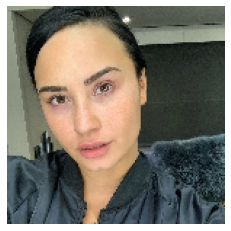

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm.jpeg",
    "https://cdn-image.hipwee.com/wp-content/uploads/2020/03/hipwee-87232136_2880169575360071_1798872882638650715_n.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
predict_2 = model_2.predict(x_2)
predict_2

array([[0.09542752]], dtype=float32)

In [ ]:
predict_2 = model_6.predict(x_2)
predict_2

array([[0.17831117]], dtype=float32)

1204224/1199351 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

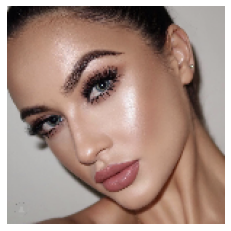

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_2.jpeg",
    "https://2.bp.blogspot.com/-1pE6ZFk99Bw/XOMNsREHq-I/AAAAAAAABAg/oefI1mtzG90vitDYtOw_-qTE425Z2-mPwCPcBGAYYCw/s1600/21-Best-Natural-Makeup-Ideas-for-all-Season-and-Event%2B%252810%2529.PNG")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
predict_2 = model_2.predict(x_2)
predict_2

array([[0.00736923]], dtype=float32)

In [ ]:
predict_2 = model_6.predict(x_2)
predict_2

array([[0.19888407]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

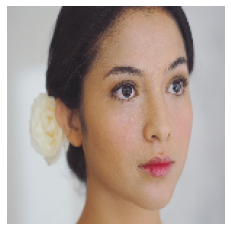

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_3.jpeg",
    "https://akcdn.detik.net.id/community/media/visual/2018/03/03/624e6099-c4b5-4a07-91f9-6dabcea5931e.jpeg?w=770&q=90")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_1 = model_2.predict(x_2)
print(predict_1)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.12991826]]


array([[0.24274927]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

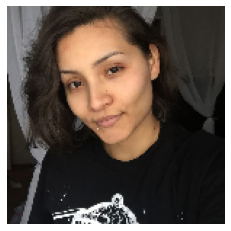

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_4.jpeg",
    "https://i.pinimg.com/736x/54/b0/ef/54b0ef4255644725d380426cefef1bf9.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_1 = model_2.predict(x_2)
print(predict_1)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.04058614]]


array([[0.35866317]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

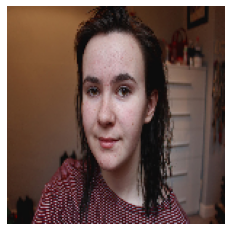

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_5.jpeg",
    "https://1.bp.blogspot.com/-8bcVfRrilgE/VolbLzRe9_I/AAAAAAAADlY/111e51uo6Us/s1600/IMG_9087.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.04448118]]


array([[0.54625326]], dtype=float32)

237568/236312 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

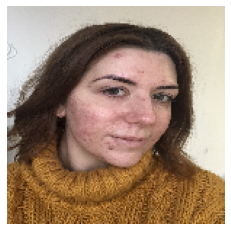

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_6.jpeg",
    "https://images.squarespace-cdn.com/content/v1/59707a97cf81e05c0d317547/1515696008845-BREC5ZEDB6498TFE6DFJ/ke17ZwdGBToddI8pDm48kJ9Vf5x0a7V4oPpXjx7dc1N7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1UaX5h46DTa2zhpD2S4dCqlGPZmkhkBVHbtbQ1eKMXMLsDypYv5Z9qB9WFs-NjPCfmw/Blog+1+Pic.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.1311525]]


array([[0.17156394]], dtype=float32)

32768/30514 [================================] - 0s 9us/step


(-0.5, 149.5, 149.5, -0.5)

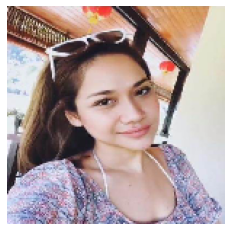

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_7.jpeg",
    "https://oss.beautynesia.id/photo/5b62e0087399a874a530c044?x-oss-process=style/_m")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.01740042]]


array([[0.09389002]], dtype=float32)

   8192/Unknown - 0s 0us/step

(-0.5, 149.5, 149.5, -0.5)

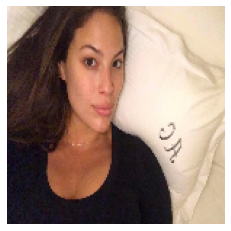

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_8.jpeg",
    "https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&poi=%5B673%2C504%5D&w=1346&h=897&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F14%2F2014%2F12%2F28%2F060117-bare-face-selfie-graham.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.18845306]]


array([[0.22591724]], dtype=float32)

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_6.predict(x_2)
predict_2

(300, 300, 3)
(1, 300, 300, 3)


array([[0.30707467]], dtype=float32)

8192/6879 [===================================] - 0s 0us/step

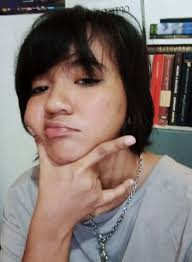

(-0.5, 149.5, 149.5, -0.5)

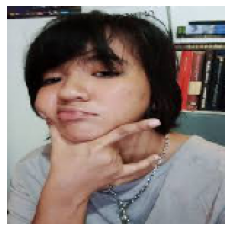

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_9.jpeg",
    "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUWGB0XFxgVFxcXFxoXGBgXFxcVFxcYHSggGBolGxcXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dHR8rLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tK//AABEIAQYAwAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAQIDBAYHAAj/xAA/EAABAwIEBAMFBwIEBgMAAAABAAIRAwQFEiExBkFRcSJhkRMygaGxB0JSYsHR8BThFSMz8SRygoOiwhdzsv/EABoBAAMBAQEBAAAAAAAAAAAAAAECBAMABQb/xAAnEQACAgICAgEEAgMAAAAAAAAAAQIRAyEEMRJBMgVRYXETIjNisf/aAAwDAQACEQMRAD8A5bCaUVsa1y2kaX9I4ydHGk/MPkluMOvazy829STvlpwNPgtIze7QzSBQaQQQJ59Vcbe1xq1sAc20m6fHKi9vgWI+GKDxlGUGANP1RWhg+LNYWNBh3vTlJ183JXJ2clH2YqpRrVC9xDifecYPaVLXsrkMYXNdlcPAd57H4rU2vB2KMdmBjSPFUDhHQtdIIQXFqFekTTfWa4ndtMh0eRgadkGwfoGPwmswZnUqgaOZaQFLQc5uzPkobjEapEOqPPkXE9pEqo69d1XS8X0JHz9n0Nw1cj+kt5IB9k2QSJEBUsV42tqL8hdmI3y6j1XBv8RfHvHTTcpouSSCSlsPifR+FY3RrtDmPEH17IqWgL5mtsWfTByuI22MI9R+0C6yBr35oiCd9OsboqQHFnf2BqcXBcEtPtDumDV4eCQS06GAdQC3aQlHHFQtID3Ml5ImahAMjKSTq2CREdOiPkDxZ3c3TAYL2gnYEj4pgxCnBIJdlMENBcQQA7YanQg/ELkOB4yyr7PNdPBl7SHFo0frvl2Oy2No26ZUNSnVbUblAAqeGRlaJztET4RqQimKbWlVDgHNMhwBBGxB1BQ3iJssb3I+U/om4Hftc0UiCyowQWO0PcdW+YT8eH+WD0cP1H6ovo5hdrpA7Lyjt3SxvYfRPXHDgU6VGnLjhV5eSwgcCQlleASOXDCLxXgUG4gxQUqbjIED+armzjO8X8REOdRpu9333GYH5QRzXLsRxFjcwYAZO5/ZMxXFy8ZW/iJc7m4k79kEcEgyQ6rVJUZcnFqblXDCSpGlRkJ7Fxw4AnRONMjQqxY0pe0dVexO1hw7JbHUdAgnVK1ytPoc1WNOCiCqHjyWp4T4rqWzspJLDuCZjsFmKI5FSHSCP55IiM73Y3NO7pipTdlqASx4+6d4P6jor9/f57V+cQ5hAe3o4OGx6Eag9CFxThrH32zw5p8J0cOoXRsZxphtn1mu0q0y2OlSn42+ozD4BNejJqjoGH1JpMP5Rv2U7qogwQsPd4jnwprhpnbTEA9XtBCDcCGLh5GoGYbzl1EH5R8UvnUlH7gbop3XH+KZi0W4aZgeB0/NMfxdjXOk4f8AaWrxq3NSo3IIdMl2sQrOLXQaG5zpEQqXjQtswh4qxogkNdA3IpjRVHcSYufvvHYNC2uJ1CLd0HK13QarMFoy6k/ALXDx4ztszyZXGjqwSVBolBXnFSFJVu6sNXGvtA4i9o80abgWj3iOZ6dlv+OMeFtRJGrpIaPzEaH4LhTnlxJOpOv90rCkejRNITHVEjXLhh7gvQkO6cOi44ZCXJBV2ytc5ACkv7TK4jolbGStWJhulRvcfVHbml7So4tHhGg8+qz1EagrfYFYhwzxpAa0fUpJ62a4t6M7UsI0KGXFuIW8xvD4OcDbdZPEqMSRySxkaTgAmuh23NJU8JI5cuyfXZqoarpAPRaomkiWnU0RyzxY+wdRMEGD8RMEecEjt2WbplTUH6hEWjqVMvqYLTDA4uDoHs2knw1DyHTdCMJt7+gQ+lTrEuBzA0iRqR67BXuD+OWWls2k6jUqGSZZljUk6yR5o3b/AGrt0As6xjoW7cua7XYvg/sDbe4xJx8bazf+z/ZTPwu7rOb7Q14AP3Gt1jTl10lFR9qZJLf6CvIMRmbvrp8k132pGJ/oK0f8zfP9j6Iuf+x3h+AbdYHeuaGH2+XyDP2Qy54VvoAYK57hgWnP2j1zGXDaursol43kiPd6gqP/AOSLmCf8Of4dD4/OPw9UY5XHqTA8afcTbhRXb4aSpQqeMvik4os45B9qmIZqzaY+6Mzu5/ssGx2qMcW181zU6AwOeyBZkg66ET2qMlK1yIRxKezVMAlEbGxc7Yfzmg3Q0Ytl3A2hrwXGB1UmN187pbMdSIn4KazsQ0+IzA2+EqLGbwO0Y3SN1nds28aQHZWW64NxKD7Jx31Z35/v6rnhJlXba8c0tcCQWmWnomkrRlB+LOv4wwGkfOB6lY7GqEafmhH7HGmXFFkEBxe0Ec95/RNxvD87CRvKm6ZaqaOeYtTh0Ia1G8ap7mNQdUDCpjtEeRUxG7qWidVGOaViYzQfwI1nSylTc8nWGiTppKKMqXLKn+i4O5gwCI016bKL7PbvJcN8zHxIIHzIWkqE1K1V411J+AOqwyz8S/h8eOabUnSSKLb+7cS4W50fmOrZkfHUapjsXu6QBdQIa2TJjYgjXX8xV17iC2N5cfXKP0QnjK4cP8vNIkD5hJB+XoPJ4yxN09Er+LqrGgmDBnQ6yZ1+f0TKnGdVzcuXSST8TP1WcxJw9m2N+frt5q1TwcupOrMdmY33zLYb5HWVRGMPZBK/R9DBDeIjFFxnbX0RIIPxcP8AhKxBghhM9gtWZHzti1fNUe7q4n1JVBSXDtVEEhoKSnU2yVYtLIvRqywmBMJXJI1jjcj2D4Nm8TtVq6GFhrJA15DyIgqrhLNWt5TJW3trPSYkKeUm2VxgooyFTDJdA2M/OFHWwNoMH+fyfktZXtIJ00jRBsQug12p26rnJobxUjBY3h2RxgbJmEMa45HCQefMefZG8Xu6D5BqAExp0QXDngP0eBGoP6LWLbiTTjFS0HbDDi2q1uwJlpHXp8lsrMksyu1InX4nRZ6xuGuy6jfr2PrIWztqEtHqsZuzZJLo57xLZaExyWLJ1XW+IbLPIjcLlN7RyPI6ErTDK9GOdeyJx0XmppKcCtyc0HCbwKpnllcO7atM/SVtcNHhqH8v1I/crnOGE54G7h9CDPyXRrWqAx45uAHoZP6KXkPo9j6XG/J/orvHjYPL/wBj+yzXFdbNV/6/otPQaXVhES1oOu34o+ayGOHNcZfzHfvGqOFGfPlt/sn4ytadJ1FjBH+Uwv31eQZdr8NpCr2eI1KVpVY1wyVn5XNIBOjZzA8to+Cl43uzUutYloDPC7OIaIEGB6Qh1fShT83OPpAVVWjyG9n0o0oVxWJs6/8A9bvoUVCgvqAqU3MOzgWn4iERT5ZqptMahWsUtjTqvpuEFjy0/AkKswapTRG7whtGk0GoWiRzRipjVoGDxDXQGDy0MGNVh7OwqVJlszsZ2+C0eB8I7GrJaNQ0kgAneB8Fi1FdsrUpvpBWxswajXNOjtdFvLdkNjyQLCbcF5IEBugCPF8aLBvZtK+hHUpCyWNcLvdV9qHyNIYRoOvdbWk0FSVaQTJ+xLOO4zw8+q+cgbqPcEfJRWfBtQmC10dSI/mi68bcdFLTpDon/kYv8cbMLgXCIpCSJPMnX0WuosDWwiXsdFXqsWUvJjJIDYhSmSuVcZ2uWsT+ISuuXA3XOuOqGmbmPp/suwupByK4Mwrk4LzgkCtIAtw//rNW2a7lzhYXAa4ZXZOxOU/HQfOFuafvH4BR8ntH0H0j4Sf5H4aQa2s7/wD5Ea9BAKytDx3tIdajfm8LrNpwzQhr/GHHUkOO7lhsfsKFjiVIjOWNa2o4aOMy6ImOgWmKS6PM5WRTdozXGNUuvaxP4iNPLTqenVUL8wykJ2ZPbMSUuLV/aV6jxPicSJ31JI5nr1TMVOoEEFrWtIOhBAVSIGfTQSpoTguEOB/a1ahmI1IEZ2see5EE/wDih/BmDis8vcJazl1K1H222RFxRrcnsLD3YZHycrH2fWOW3aSNXEu+B2WOWVRKuOlKWzR2NgGiA0DsFYq0YHdEaFMaIdj9wKZaeX6qbx1Zfe6CGG2YaFZvbUgTCFWmOMLd1NV4mYzcF0cmguPoEySaM2pWSW1UtInZEPa6oazE6VZhLfmIIPQg7JLSodCu60GrCwCkp01FSKlcUyQrG139FTrVOXNTVXKpUbrKEjkildvWI4vbNJ3ZbDFHQCsbxV4aDuyzj8kM/iznoTU5vJKQrjzxA6DP8nkuiYTVz5Xfiyn6aLnBW4wCsRQBGhbMeUSR+in5CtI9b6VNqU4/j/h2K30aB2+i55iwZVxioHtDmsomQ4Ajw083PTnPLukPGFyxmaWEjbM39iFn8Gxg1Kt5cVi1r30XgQCBmIAa0bwTl015aIYou7IM0HDTMxbAOqgHYuA+ibjLyarydDm+ifhrZqtHKSfQFVL18u7lVol9n1E0p4UbE8LhDnn212ma1pPA92rBPk5pH1hP4eaG02NGwAHyWk42wz+os6tPmBmb3aZCwHDWJHKCQYEAmNJGiwzLRZxZK2joFtus7xVLgBEjWUYt7iRKzfEuIZHNWN6osj3ZnrLDnuqaZgPMwFsLDCGx75n8qFWWMDcwe4RzDsYpu3y/RFJjSUqHUOHBM+1qAHcCNVoKFg1rQByVa1vqTz4XCehOv91fZUTKJhKUvZExkJ7lKagULyjVATInqvV0U71SuKnJZyGB99rusLxxWAp5epWwxG4gFcz4mv8AO49G/VDErkdkl4wAZpEOynoD+qSp7vZPqV8zpjWExp0I6qwiIqg17rbYLRIth1In4GAFijyH8ldbwHh17rZha9hcGiWk+QI19FjmTaVFvByRg5OTrTSAt7bUxQLzVbnAk0i14M7QDsSN0N4cEWV66Dq1jZHm87raVOH7h+jg2QDE7a6AkgQ6OizlLhHEKdF1AMaWOILocwyW7EE6hdDow5ErfdmQwzR5IEwCfOPLzQ+odVpH8J3zD/oP6eEtP0KHXHDt0zV1vVA/5SfpsqNEqPpBifKiaU9AQcVgcYwB1tWfWptzUahmoyPdPNw8lvV46oNWNCTi7RzuyvmsdkzA8xr15HzVTGCw1GudyOk7aqxxfhvsriabMragzEj8Q0dA67eqH3QLmQ4aj1hSyVM9bFK0pBdmQgaD0V2xDWayB3ICzFtTc6ASY8kZtcFBgnbuimbSlov3NtTrGSWz+UfQqVmDOBBZcPb5TmHzVu1whrRorJpkIkzn6RLTkABxk9dpT3O0VfMVFWrQErYqRLWqaIVd3IA3UNxiOsCXHoNSqNawuKvIMHmf0Czbs0Ua7M7xJi0AgLCsY+pOVrnGdmgk/JdWteEqWaa5NQ9Do30G61+EUaNM5GNYwAbNAC2xutIxyx8j52r2z6fv03snbO1zZ7SFG3ZfR3FlK2q2tRlbLkynxOgZTGjgeRBXzhTOi3JpRosWNA1KjWjmfot/ZtyZSB5fDr8Fj+H6zWvk7rZ275ATpImythBt4RzcOz3D5JG4i9uz6g/6p+qqZlC4pqRjbCn+NVeVV3xDT+ikGP1R94HuwfoQguZJmXeKH8mdcYVIomlSSkNBwXkgK8SgcC8eohwYTu1310KzuOYeAA4DfQ/oifEt8A5lMS6oSHBrTo1oOr3+XLzKsXlL2lMgdFhkWy3jS0ZWypBru6P2izzSQ6HaOHzROzvgDB3WKLWrRoGXCkY6UMbehOrYm1o77Dn2AWtmLiWq5AEoJVe+u4sp6NHvP5DyHUq2LapW96WM6feP7IvSt2saAAAAk7Yb8TP0aLaOjR3J3PcojTvWRModjNSmDJPwCAC6e8wNATsF1UGvIM4pe65mnXohV9dVR4wC0gdVPStvGPLdWL+lohYfwcu4ivrio8irUc4DYT4fRCKDJMLoGNYUHck7hXhym2pUNSJhvsweZObNHYD/AMh8dlkVE08TuwVh+FNEGJ80bpjSEfZhjRoBp0XqmEMOuo7IQ5C9mOXiy7TsBFROK11rwq0glznCdttO/VAcXwapQ1cMzeTm7fHoqlJMkeNoFymykcYSFyYU6+wqRV6ZUwKQ0JJSOKhq1g0aoXeXhIM6D+bpRkiC/v6FPMG+J7hrHnpq5X7PQdwsJcvzO7lbm0PhHZT5HssxRpAzG8NzGWj03CBDDriYDZHU6LZ1DKSiUhuptIzdPhyqdX1cvkzf1KLWGFspmQCXfidqfnsidbZetiIDiuas7zbHMfAJdosvj/EUSGI5iE1NOSzONYXO26DdHQS9gWjXNSS8yUUs6Y3QJksfl8ketmQJK40bLlsZJKfX1IUVmAAvOqiT5IMX2V7u3lEMLoD2hOUE5QJ08EAmY38UxPkq1GoHFEMOpnUmIPVpDpBIDg7m0g/yEYdi5Hqiy6in2lKTPIJtR8mBurlNkAALXFiT2T5cjWkW6bl6pTDgQRIO4PRRNKlaVu4k6ZlMU4OBk0XQfwu1HwPJZW/w+pSMVGEee49ea6rmUVVgcCC2R0IkIptAcE+haZT6lUNEqCk5QVjmMk6dEWIkMc8uMlRXltmYW/iBVp2kEbKG6OoXKIzZiTZuZVAJ+8Fu6IgDsheK2gMP5gg/NErd0gKbKv7FmF3Ee5LSYZSwnt0SJGh6sTC9SbDQFG96R1ZFALbaYQzEKIzDzT33gHNUrmqXmRsBA7lCVMaKZkMYtPZPbVmc+hnryTbjEyANd0V4iw99WjFMZnAiBpy33Qi34Vu3Rma1vdw/SUqHssMxEhvRWMGtH3BJmG8yRv2RTCOFNZqwY5Db+6M4nVZQaMsDWICNAcvsU6+AtbTDqb/ETEOI7E+Ub9gord4a3TYmRvrMbTsNhHkohcS4GoSQ3xRMTlIc4Dr4ZnyKsWjC853aDcD9VtGFrRPPJT2XLJsancogwKvbAESpSqUqVEjduxtStCkFSVA5swU5xHJcAsgpzXqsHaJbd28oNDJjKbtFCSloO5JHlD2KuiSi+RCjuB4eyYZb4h8VKXS3uExxSv3+COpH7qzaHQIZVdLmt6TKK0NlHl3MuwqoFkFI4pJUT3aoJDivdAVKrUJUtSoqtSquY1CNbJ6qwAI1VWpcBolDa14XmJgeiAaYZs6gLhGwKNurtb0WQpX7WCGy87aDRVbi4rPOpyhctAcbDWKcQgOIZqs7eXj6jhmkk6ADqqlesJyt8R5Afr0RzCsNcxhedartAYkMB2077rSGNyZnkyRgvyXbCz0AdJI1kt0cHspnwH8ILYnmr1R33Rum025Who96BmIAA23gbDyS27PFHIanuf4VYkktHntuTtlykIEKSU0FecUAiOUdROJUZKBwvtU+g8RB3UBITc+qDCQ2tTxkflH1Mqx7QGRz/mqo25zERo4bHkQd2lXAATGxG3Xt5hA5dDqb+SjPhPkfkUr9DKZfVIpuPQf7It0jkrdFKg7NUc7zj0RAVIQ2ybAH1VrVQXbs9PxpUWzVhQvqqIu6qGs5O2BIZVrqIlKQhuIX2TzPRKtjPRNc1gBJKHNuWvdl2gwZ0KD/ANfUqOOUTG8mAO8qzTeAQ5xDg2ZInwkkb/l2g8iSto4WzGedLo0tzdNYA1rZPyQq49pU0LsrfLdQPvW8jJ8tVfsLJ9XV3hZ8yqI4IrvZNLPJlnAsNbyHhG5PM9+aLCuHuLGuJZuQJDc7HNLXExDo8YgHffZV8QuxSpta1roOgaweKACXET0AJUWB0MrScuUvMlskgEgTvz0WnXRg3fYZdoO6dZDQnqf7BUatx4jHLQdzoEQpCAAOSDOROExxUZqpJQGHvKY5yUqvVfyQAK4ymgeIeq83QJlu6XOPKYHw3XBG4eyWqzUHJ3qmWbIA7D6KwT1SoYqsYQCCZG469kOxev4Wt6u+mv7IjVbAlvogGIV81Zo5ATHmTHrokyuosfBG8iCNudFOXKvRTiokeixXVl5gnVVnFWWVA1snkmAyviNbK2fksp7RznFx2Pp2RfEahLXVDtGg+koHhbiWZTu36Kjjxttk3JlSSJKllTcdRv0MH+6bSsgz3cxEiWmQ0xycR92CQY5EqcHkrdtb1d2D1iPmraIWy1gmFNIl3LcDUdd4R+rXp02ySAAOay9tWy0nA1HU6hqBrCfcc0aOb5ESIM7AjpMDrYuqFpl5a5zHCoYjwwSWR1cCDP3ToULFCNKq6vVJJzNa4FuX3NWbHScwlwI218kcBifIfMqCwtW02gN2CS8qQ2OZXHHrI5qg6DxH6D5/RG2HRCMFb4XP/EdOw0+sopTKV9jDHDmlaU17t1H7RAZE1V8KJg2PVeqOTHP0MctVwBbh4a0noJSWjYY2d9z3OqqX75DG/jcB8NyiDoCARmH3TX02PGzmgg9xsrRQ6ytRTYGNHhAAjsIkKcVsuh1HXp3SxCz1eenosqH5q7z5x6CFprysA0unQAn0CyOEAuOY7nU/FY8h6oq4sdtmkthKmc1RW4UpKnXRU+xmQKC7bMN89VYe+Aq3OV1nAzH3AMjqgFNpa4EfwI3iVP2lVjOp1+COUMKptHugqzjfEh5Mv7UVcPw9mUP3JCv1KQjy6Ie0+xcW/cOrfLyRNj5GqoJGZp9m11b3nNLyPZlmrmneQ2fFsYAIMwrmC2eVgO5OpJ31Va/w4f1LDq1gyucQYMSAY6HbXzBVy3q5HvpZgfZuLZBmYOhnzSr5Hegs5wAhBcQrFxgbnQdzoFNeXnIfzyUOFMz1Mx2br8ToP3TPRyDtCmGNa0chHop6blXc5OplIOOeVEDqnOKilccSvJUZdBHonFRVRogFFV5JrsHJslXL+vAgbnQIfYS6o95/kjVRvr5nkjkYH7rohl9g/bOkL1Wn00+i8vJUczO8Q1stFwbpJDT8VUwpogLy8pc/ZfxfgG6Lk8u1Xl5ZI2Yxz0j9l5eXM4C0Xf8AEg9Af0WpoahKvK3B8DzOT/kZVvrYOBBQ2yuy12Q6xpKVeVBgQcWg+yY6YIdGnmD+wQ+0qOdRpF2UZGkAicxBc53i6wSQPKEq8kXyC+hmcyCtFhFLLTnm7U/oPQLy8jI6JZ5qUFeXkBhOSjhKvLjhFDd1IY4+SReQCirSOSiXfFDLGrz6ifXf6JF5FdHPs//Z")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.1316815]]


array([[0.17668447]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

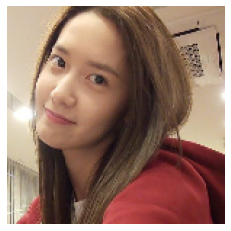

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_10.jpeg",
    "https://i.pinimg.com/originals/d0/3c/1a/d03c1a3c16e7b7b4237352a0939bfc30.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.1681409]]


array([[0.31180003]], dtype=float32)

163840/158078 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

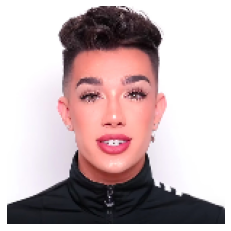

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_james.jpeg",
    "https://cdn.vox-cdn.com/thumbor/zFRhoA_2HdHPGnv7jU7TGtPJ4kM=/1400x1400/filters:format(png)/cdn.vox-cdn.com/uploads/chorus_asset/file/16286694/Screen_Shot_2019_05_19_at_12.22.36_PM.png")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.01290974]]


array([[0.03759651]], dtype=float32)

1064960/1062833 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

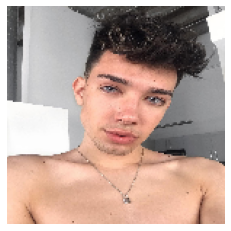

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_james_nm.jpeg",
    "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/james-charles-without-makeup-1563466045.png")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.03176741]]


array([[0.07157085]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

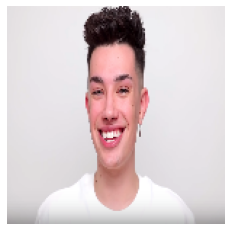

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_james_nm_1.jpeg",
    "https://www.j-14.com/wp-content/uploads/2018/12/james-charles-no-makeup-youtube.png?resize=1170%2C702")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.05791269]]


array([[0.25042725]], dtype=float32)

73728/65614 [=================================] - 0s 3us/step


(-0.5, 149.5, 149.5, -0.5)

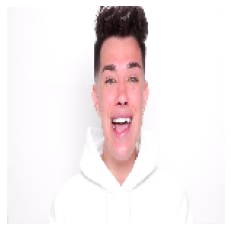

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_james_nm_2.jpeg",
    "https://www.etonline.com/sites/default/files/styles/video_1920x1080/public/images/2019-06/eto_trending_jamescharlesisback_vidpic_061819_0.jpg?h=d1cb525d&itok=2rX1g-h8")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.06424323]]


array([[0.29933137]], dtype=float32)

16384/12112 [========================================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

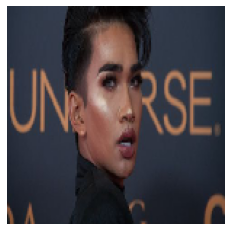

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_bret_nm_2.jpeg",
    "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/bretman-rock-1502766059.jpg?crop=1.00xw:0.757xh;0,0.222xh&resize=480:*")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.09658453]]


array([[0.22487073]], dtype=float32)

98304/94296 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

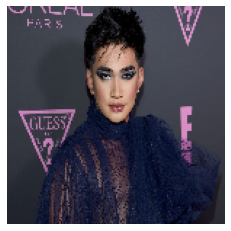

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_bret_nm_3.jpeg",
    "https://i.insider.com/5dd6c9ed79d757799c70e0a1?width=1100&format=jpeg&auto=webp")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.0118615]]


array([[0.09079327]], dtype=float32)

139264/137860 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

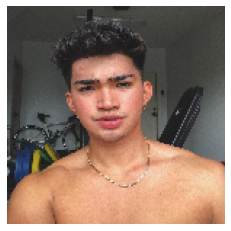

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm_bret_nm_7.jpeg",
    "https://qph.fs.quoracdn.net/main-qimg-6780b9856f6a493be9728b6e1098b6dc")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.05682352]]


array([[0.12270353]], dtype=float32)

16384/14516 [=================================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

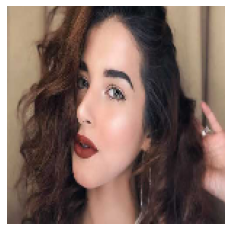

In [ ]:
file_2 = tf.keras.utils.get_file(
    "testimg.jpeg",
    "https://storage.googleapis.com/finansialku_media/wordpress_media/2019/04/Wajib-Dicoba-Inilah-Tutorial-Make-Up-Bagi-Pemula-01-Finansialku.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.23897943]]


array([[0.4287037]], dtype=float32)

24576/20651 [===================================] - 0s 8us/step


(-0.5, 149.5, 149.5, -0.5)

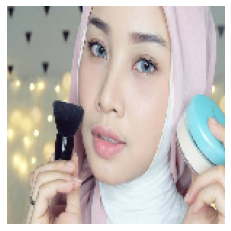

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test22.jpeg",
    "https://www.finansialku.com/wp-content/uploads/2019/05/Tutorial-Make-Up-04-Finansialku.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.00637162]]


array([[0.16437009]], dtype=float32)

32768/26434 [=====================================] - 0s 9us/step


(-0.5, 149.5, 149.5, -0.5)

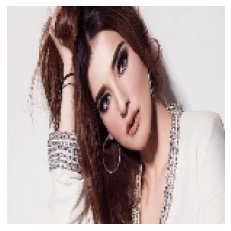

In [ ]:
file_2 = tf.keras.utils.get_file(
    "tasya.jpeg",
    "https://cdns.klimg.com/merdeka.com/i/w/news/2018/04/06/960586/540x270/8-fakta-tasya-farasya-calon-dokter-gigi-yang-pilih-jadi-beauty-guru.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.05419322]]


array([[0.12763685]], dtype=float32)

In [ ]:
file_2 = tf.keras.utils.get_file(
    "tasya.jpeg",
    "https://cdns.klimg.com/merdeka.com/i/w/news/2018/04/06/960586/540x270/8-fakta-tasya-farasya-calon-dokter-gigi-yang-pilih-jadi-beauty-guru.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

122880/115859 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

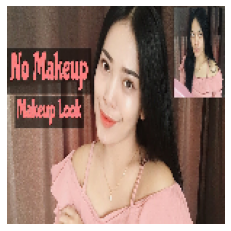

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test23.jpeg",
    "https://i.ytimg.com/vi/2s8dW-jqMqM/maxresdefault.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.03686092]]


array([[0.2492507]], dtype=float32)

57344/55602 [==============================] - 0s 6us/step


(-0.5, 149.5, 149.5, -0.5)

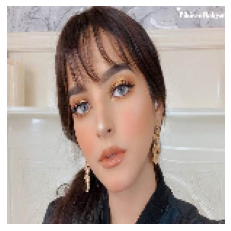

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test25.jpeg",
    "https://assets.pikiran-rakyat.com/crop/81x0:873x594/x/filters:watermark(file/2017/cms/img/watermark.png,-0,0,0)/photo/2019/12/21/3008543124.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.14933231]]


array([[0.47789654]], dtype=float32)

65536/62660 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

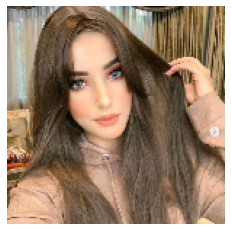

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test26.jpeg",
    "https://cdn0-production-images-kly.akamaized.net/m8UUsH9jZzUbmyMbTAZOPgGKQFA=/640x640/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2963923/original/069245100_1573455613-Tasya_1.JPG")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.07228376]]


array([[0.5869546]], dtype=float32)

630784/627224 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

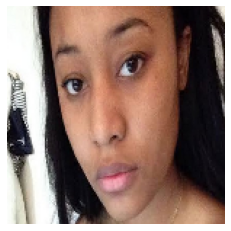

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test27.jpeg",
    "https://images.theconversation.com/files/44691/original/qzhb6bny-1395741831.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.13606355]]


array([[0.08585114]], dtype=float32)

98304/91047 [================================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

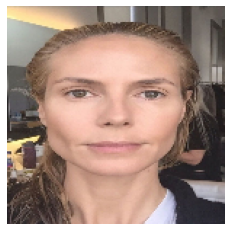

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test28.jpeg",
    "https://hips.hearstapps.com/hbz.h-cdn.co/assets/15/16/hbz-insta-nomakeup-selfies-04.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.07150675]]


array([[0.46093845]], dtype=float32)

8192/4484 [======================================================] - 0s 0us/step

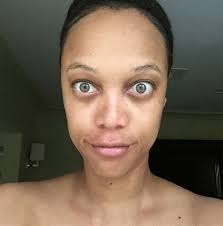

(-0.5, 149.5, 149.5, -0.5)

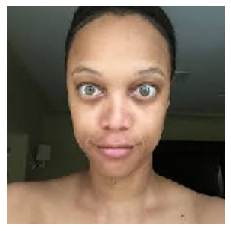

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test30.jpeg",
    "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExIVFRUXFxUXFRcXFRUVFxUVFRcXGBcVFxUYHSggGBolHRUXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFRAQFS0dFx0rLSsrKystLS0tLS0rLSsrLS0tLSstLS0tKystKystLS0tLS0rLSsrKy0rKzc3Ky03K//AABEIAOIA3wMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAECBAUGBwj/xAA+EAACAQIEAwUFBgQEBwAAAAAAAQIDEQQFEiExQVEGE2FxkSKBobHRFDJSweHwFSNickKCsvEHJDOSotLi/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIhEBAQACAgICAgMAAAAAAAAAAAECEQMhEzESQSIyBFFh/9oADAMBAAIRAxEAPwDkkySYLUSUiUCpklIDckpABlIlcBclFgBrjpgdQ6kMGxuKVODl0+L5HHVqkpzcnzd/0NbtLiLuEFw3k/HkvzMmEbuyQlSElfZfoEp4Vv8Ad/8AYv4XBq6Wltvlx+HU6XLuzsmk5eyumxFzkaY4W+nLUcrm/wDDfrsGeWSiryjsufFbnoNDLYJadN+oaeWRkt4+u5l5m3geb1MuXT3W3BvLOu36nossgi3w4cLXLEcphzin5/UflLwPK54Fpc7FaUbPc9bllkbcFw5nN5xkCv7Mb39OZWPLKnLhscPH9+RcwOOlSleO8dtSvxX1FjMss21y5FPUasbHoGFxCnFSi7pq/wDuWEzkOz2P0S0P7svu+D6HVqRpLtlZoZD3B6h1IpKdxyFxXAJ3GuRuK4BzaZJSAKRNMwajJjqQLUSTGQqkOpArjpgBdQ6kCTK+Y19NOT58F7wDGxknUqtryXglsamWYByeiC/unb1S9Slk2HdSVuC/xP8AfM7/AC3DJJJKyMuTPTo4+P5J5VlVOmvZXm+b6m1To7bIWFpeBpUqJyXLbtmMitSwpahhi3TpFiNMRqLogp0jT7oH3W4wyatEp4ignyRt1qT4FKtStxGTi87ynbVHiuK6nEY/C8WuK49fej13FxRx/aPKr3qRW642tvyN+Pk+q5uXj+44OnNp35o7XLcVrgpHHYtWd/Xw8ToOzVX2Gr8+HS51YuTJvJiuQTHuWzEUhagY6YATULWDuRlIA5mnO4WMinGQdSMI1H1ElIBGRJSKIbUSTAaiSYAZMzc6e0V1fy/3L6kUcem5QXi/XYBPba7MYSy1PqddhKZk5bQ0QivmbmEicPJd16XHjqNTBwNWjEo4FGvSM2iVOC6B4wHpIK0Um0HuwUqO9y1YFJDCtKBTxFI0ajKeIWwBg4qBlV4XNzELqZOJjvdBKVjz/tRl6i20tn8L+BQ7OVbTa5NfT6nUdq6f8u/72vsclkbtWflL4tHbx3ccHLjq11qkPqAKYtZswWFIWorqY/eABtYzmAdQg6gbGnOthKcwLHTMGi0mOmBjMnqLAuokmBuSTAhlIjTjqq04+Lfpb6kVItZMr4mPhCXziTn+tXxzeUdnh6F0aeGp8EiGGpezc0MHVpp2bVzg9vS3pewcDUw6+H72I4KMWlaxepwQ9Fciih5BNIkhp2DoGcCw4jKI9DapOFylil4Gw0gFWmmg0NuXxUXcyq8NzqcbCC5+Zg4iju2ncnWj25TP4fy5HE5XC1WT5abfFHfZ+vZkvB/I8+yn/qS8vzR1cN6cnPG/qFrBXFc6HKLrG1g2xtQAXUNqBXFcAxGxmx2RZktOErBoyK1ycJjgWFIdMEmPcoDKRpdnoXrp9Iv5xMlM2uyivX/yP5xIz/Wr4/2jtVCc/YjyV5b248I3sGjks5camhdI3u/G7BzxOh+ZL+JRj9+aXm7HHt362sUqVai1om5W6tv37vY2suz2XCpC3j1fQ5qpmtPlUV/Ms0MyvtLdfErZfH+q7ejiNSuF7w5zBY9cjThXuTs9NDvCPfFKVba9zOxOOS5hsaXcVmOi7SvbdmFVzTET+77HuTsvG4LE5yndR3+SKDx6vac0vBtL4FypuIrwNWbv3k7/AN1r+dv0I1O8otaovT/ifFS8fNBY5jFK0akW+iaG/iur2ZbrmFpfFj9ot43XDj7jgMr0rVJ3u+iT297XVnf53D+VO34ZW9HY4RxSjGK5JJ/T1+Ztwufn+lvv4fifvj9GLWuTv7mvmUlHcPHY3cw2obUC1CuAE1C1A9QzkAZzIsdsZmakRrjsZjAsZE0ysmFTHKYqZtdkp/8AMLxjJfJ/kYSZo9n6lsRSf9VvVNfmLPvGnh1lHoOdQtT1JbrgUuynZuOJUquIqTUYpuShLTslvdrdm7KGqKCdncS6Tknbg000t0+TXNHLxZSXt28uNs6cZUwlKU4Rjal3jeiMpVpvTZ+1Kd2r7Lk+Jdr5PUo04V6cnKlNXs19x3s4ytxs01qSXkbdTs8nJaasIwV9KlHVKEX/AIVJ8bdfA28TmVKnShRhpUYR0q71yfVtJJXfHib242McMOSWORyjMW5qMk1f97M7jBw24nJ0sFHUnBOzkpb7Wa/D0XE7nJoXW/E5rO3WBWg7M4jtLjXGWlNs9KzGFkcJmuX3nLUnp4tr71uiHJ2TnstwdfEy7un7C5yeyS6t+XJfAlgcFT7yME1JSdo95WdKU1w1pU4vTHlu290dXk+Y0o2jGMVa/wDS31un9THq5FU1rRolFN6JSk4uKbbtK3S/v8Dow+Mc3Ljnb0Jjuy0Z4ZYrC1qii026VR694XUot82mnwMDKKs5vS73T632/Q7mpiKeHw0aFOWrTfU+spXlJ+Cu+piZXlyi+8tu935vcjmuP0fBjlrtVzv2aE+ul/I4HVsdv2yraaMl1cV8TgyuD1tl/Iv5aFuLUC1CubucRsVweobUBiXE5A3Ib/NL0X1AK7GZJkTM0RmOMBoseDGaGADJlnL6mmrTfScX/wCSKal4E9XmMPb8FG8Exq2Xt7rjyK3Z3FKpRpz/ABRi/LY6XDQ2OD1Xpz1tydfBVFxuHyzJXJpu51v2LVxDSgoRsXNntl/Z4rZLgW8qn7Rm4nE8eofJW29/cKez103se9kZ6wkZXTS3D5hO1t7AIV1wZdvaZOnK532fcZXivFeBUw2Gqra7956JZTRRq4JRfVCKVzGHyeUmtXA0MRhVCLsuBtTdkZeNqcWTTef9r3B056uSWn+9uy+F/icLqOh7bYtyq92vuq0n572+Dfqc00zr4prFwc13knqG1kLMazNNsk9QnIHZjgE9QtQNiuGwdkWFaByRAQYxJoiwMoofSKBIASiSURIkkBPRv+HuIvQUeOmUl8br4M9EwHA8o/4e1bd5H+qL9Vb8j0vDYiyRyZ9ZV6PFd4Ru05GbnFZpMLRxBUzNakw20k7Y3dye50WT07K9jlcZnsaS06Lvg+Ct9TZy3OI6U7r6DnS7G1mlRNIycRTaV+fFFbMe0MINXu/BcSVLOIV4rRe/S3DzHRJqNTLK5pS3M7A0tMUGlWsTtnU8Tsjm82rWi7eJsYqvtxOTzzEezLyYvdK9PLs9nrr1JeNvTYod2WKkrtvq2/Uidcebbug6H4jaX1YcTHsgPa6se8uoZIawtgLU+otUuvyC6RJAE+5G7llhDgFKpQaVyuX8U/ZM9scNKJMHG/R+hNMQTRJEEyaAnQdja+ms4/ij8Yu/ybPQYYuy4nk2ExDpzjNcYu/n1Xpt7z0GjilKKlF+zJJow5ce9u3+Pl1p0VHMLLdhPtl977GBiMU4SjFRvG127c9vr8AlOvq4SVn4mcjqi7iKam+CZapZRtfh8AOAqRT4rxZsVKqa9lp+Tt79y5FqDyiL3au0XMNRhHZJR8kSjWivvTj7inLExu9Ml6hYVbEK6WxTxeMsYuJzBQe78t9wEsXrSl1unfwIqGnWxV0ct2sxWmhPq7RXnJ2+r9xp95yPPe3+d/zY0YbqG8/7nwXuXzK48bcmPNlrGsu49zH/AIhLoh1mMuiOv41wNZsVzJ/iUuiF/EpfhXqHxpNa4rmV/En+Fev6DrMn+H4/oL402nccy1mP9Px/QdZl/T8f0D40NjDTbTv9AwtV+SXkImkBjOHvM18UvL4mhjXwKNOF6kel2/RFQ2pADjeCDxK+N5AAETRBEkIhEbfZ7MtP8qT2bvHwlzXv+fmYSZIVm+l4ZXG7j0elLVbpy+gDG4K7TTcWua5p9TMyDMXKG/FO0vPr7zpKU1JWZz61Xo4ZTKbivhMmqVPu12ntxSfyNOOQV48MTF+cX8CmtUHeLsGjnFRcrmmNx+28sEl2Zru//Mrx2SSXqZGOyqcG/wCc2722t9DTqZtUlwVgNKk5PVIMrPorpHD4dKK5tLeT3b6u/QhXrWSS5/u5crySRiYmtd7GXtlar5/nX2ejKa3k9orlqfC/gt37jyupUcm5Sd2222+bfFnX9u5Wp0483O/pF/U4w6uKaxcPNlbkcVxhWNWJ7j3GsKwArj3GsPYAVxJi0iXEA6xCY0JXSY5iSrjHuvIr16K0KV1e+0d9T8Vtay/MJjH7XuAIqGPGklFvvFJuPBXum/NEIjJExAkSQh0gI6HsGp4Sb5BPsbXEW4uYW/S92clvNeX5nWYee3kcxk9PTLzv+R0VPazMM/bt4prFuYKzW5beHhbgjIw9ZbWZoQrJ8WRtvKVSnHgkCqbBZTS3uZuLxPTd8kBWgY2tyAUqNld+5df0LWFwt3qe5PF+PQaXn3buLahLpJr/ALl/8nInoWeYPvqc48G7NeDT2OCxOHlTemaafz8nzR18V604eWflsIQhGjIhCEAOiSRFE4gE6cLtLq0Rr03FrxV/iwlKVmpdGn6O4bOVaUF+GEY+9RTf+oA3qcHwSb8lcL9ln+CXod/QyyK2SQR4BHL5HR4P9eY18vquTtB/BDRyur+H4o9FqYJdCtLCB5D8McKstqdF6lmlk03xf5nWPCeBOlQD5jxRzlHI+t38C/QytLkjcVG5JUiblVzCT6Zn2JIo4ihudFVpbGZVo7ilVpn4enaSN6jwKH2ZpmhhuAqvGGlT3Hu0m3KyXNuy9eRZ7pMJTw3VXXiRtQSoyfNkqeFNDT4CjHqLYNTjaPAy8bzNTET22Mysru3UcKst0diliMvUlplFNdGkzoamHsD7jcvaLNuIxvZGLu6bcH04x9HuvU5vH5RVpbyht+KO8f0957DHC3B1stTNMeaz2yy4ZfTxQR6Nm/Y2nO7iu7l1jwfnHh6WOOzPs/Xo7uOqP4o7+q4o3xzlYZYWMtE0yCJJloT5Ms5rvv8A1P8A0x+hVQfFyvBPxX+kQfQMaRCrAtSA1dzgeip1Kdwc8Oi5oIyYbJnVMOD7nwNaMLkZYcexpmKiEjTLapEpUwJn1YlaNC7NDE0tgFJWGrQNXDbAadPkarV0QWH3EAKSZoUFchSob7l+nh1yJqgHAjoL32YeVFC0W2PVg3yIUcLua06YGgvaKhIVsLdFZYc1KtZFCVTcYPRpBXSIwmFcgKqtTDozcXhUbE+BTxMdhpcVmvZijUbenTLrH2W/yfoYGI7GyX3Ki8pL80/yPQXG5HuLmk5LGd45XmVTsviY7qMZf2y/9rFHGYepCOmdOcfFrbw34Hrywong10L8qPC6maBTiWJRItHM6QkivNFqRXkIxKDuFdMDT4lxLYYVpQIqJaUSDgAVZUblaphrGpKJCUAOVmd00EoQuW5UyeGpK7GEXS2D0HsTr01bYalHkBD8gSe4VQBSjuMgapnzb3sademVI07sRxRbkxU6LNJYUl3AC1Wo0Sx3IWMdhSiNKvMp4iJa+zWm53k20la707Pjp6+JCtEAyXEnTpE9O5ZhEAEqRONMMoklAA1GRmhhCMGvwKXMQiTHiWlwEIAlDgTaEIojMHIQgBrEqP3hCBcTr8iVEQhpFGQhAQFX6kKSEIAMD/UQgB0J8xCAgVxA10IQEoy+9++oZiEBi0ybHEAf/9k=")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.19884335]]


array([[0.2645549]], dtype=float32)

188416/182422 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

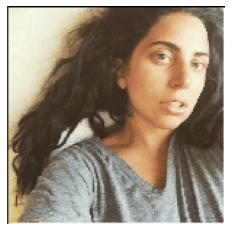

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test31.jpeg",
    "https://www.liveabout.com/thmb/d8m6B-9H0YJlCyBu3w9fyYznheo=/640x638/filters:no_upscale():max_bytes(150000):strip_icc()/lady-gaga-no-makeup-56a088ef3df78cafdaa28194.png")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.08450668]]


array([[0.38645792]], dtype=float32)

180224/179697 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

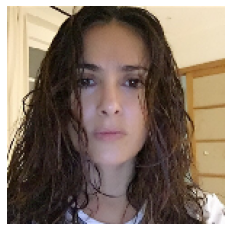

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test32.jpeg",
    "https://hips.hearstapps.com/hbz.h-cdn.co/assets/15/51/screen-shot-2015-12-16-at-115357-am.png?resize=320:*")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.15180972]]


array([[0.3576907]], dtype=float32)

90112/89390 [==============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

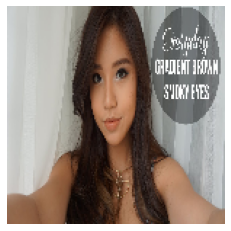

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test36.jpeg",
    "https://i.ytimg.com/vi/rlhU1ir-wbc/maxresdefault.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.08243743]]


array([[0.43828928]], dtype=float32)

8192/6698 [====================================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

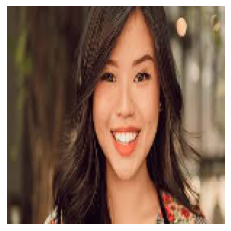

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test38.jpeg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSn-Lu_FxuHvEdnEqTsGQSHE2RyOpdaJ4-AxAmbv3jVjzfVh-OQ&usqp=CAU")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.04095479]]


array([[0.36966097]], dtype=float32)

8192/6550 [=====================================] - 0s 0us/step

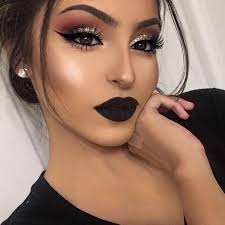

(-0.5, 149.5, 149.5, -0.5)

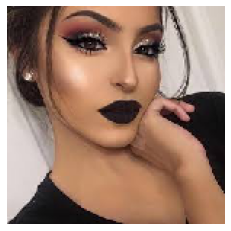

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test40.jpeg",
    "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhIWFhUVGBcXFRUVFxcVFxUYFRUXFxUXFxUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQGi0dHR0tKy0tKy0tLS0tLS0tLS0tKysrLS0tLS0tLS0tLS0tLS0tLS0tLS0tNzctLS0tNystK//AABEIAOEA4QMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUGBwj/xABEEAABAwIDBQUFBgMGBQUAAAABAAIRAwQSITEFBkFRYSJxgZGhEzJSsfAHQnLB0eEjM2IVU4KSovEUQ3OT0hYXVIOy/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIxEBAQACAgICAgMBAAAAAAAAAAECEQMhEjFBURMyBBRhgf/aAAwDAQACEQMRAD8A5rRtSc/dnLqRGcDlHcma9FoOpPp6KY6qQSeIGp1k/Wiricp+eaiba6JMcvr9UQ5+iJxiM+Eo2dEySqLJVtRtMLC8jQZdfH1TGyrTGfTzVtvAQykGg5nIeORPlKyyy702xx62qti24e9s6DtOPd9Fb3ZNv94j65eGSyu7dtlMfQzWiq3NQDDRAn43aDnHMrHk3bpvxTU2uq97Tp5veG95z8lAfvXbt0xu7hHzKqKexGPOKvUc8nWCQFY09i2sZU/UqJhhPbS3O+j9vvnR0dTeBzyKvNnbYtq38uo0nkcj5LKXe7lFw7BLD0MjxBWcv9m1aBnUT77SfoK/x4Zemd5M8fbr5YiXNtkb5VqcB59o3IdrXwctpszblKsJaYPFp1WWfHcWuHLMlg8JlycL5TZWTUhwUWsFKcVHqlMlVdN1WQ23TMgjUOEecfmthcrMbbBDS7kWme5wK34b2w5u41N5sxtQ06ZGVejGeuJkFpnnJ9Sqv7Pbx1Cu6i+WgwACRlPunvgtaeZaVsnWoNa2YDk2g4yOEBjR45rHbyUv+FvGVPdY9+F5zMCoXuYe4P8AbAeC63C6TcN4pds7NN2NX2lEE6xDujm5O9QUVM+iQWzswo9UZJ2i6QkubwTJGKSUshJKRkwjQRph5seTlJ1JJj8/VMVng5AZcE85ug/pTQaAR4KiIfqco5eCkWzJTLRxKsLVmU8/QBFORpdg2vZb1/b8lE3nfNRjOET55D0CvNlM7IHIZrM7ScX13d4A9B85XNj+23Vl1jI0GxGYaYUupXhFTpYKQnKBrrHfHDqqq/rECRmDoRmD4qP2rpw1InPvo4psbU6rL3F24apNtje5oxBodocvCJI49VtOJGX8jGdNa3aXVB16Dl81W7O2MHVHNdcMAw4gSImWy0a6klvn3KWbDA2rUD2vbTkABwl0PDGxOsmeCm4aT+bG+0W62c10lmRPDh4KNae0YREggieH1kT5BW9BkBs8eGhka5cFNFuHahT5a6pXjl7idsjbDnAB8yf9z+Xmr1lSRKo9n2AmemXRXeCAsMtb6azZmvXAVPfbcpsGZk9EW3a+ELE3eN7iSYCvDCX2jPOz0tL3egn3WR1OaqX7Uc8Oa8yHAg6CJGUJNOgxvvAuPU5eSmzTewsDQJHADkunGYz1HPl533XUd2Khe2k8mYoGmTnmWFoJ8dUx9oOyvbUSBq4YAeTjDqR/7jGN/wDsKlbm25Za0g6cQpiZ1lxc4z6K7v6GOm5p4gieUjIjqDB8FbBmtwtritQpzkXNzHJ7Ow8egjnmr+oIcVz7YFY217VpOEBzvbMHIuyqtHdJC6LcZgOCKEmzen6ig27oKnu0SJGqjNNFSKoyUeEaAkaCCDedHsyA5SO/iPzUVtM5ZdfIq6q2/bJjszDfPJM3FCMRdwH7/OAnMl+PW1U5najkrOmNPD6+SgNblPxflkVMpuz7hHl/uUUp7bPZD4YTxj1ErOWjMVYTxdPhi/RXmzH9jLl+o/RVeyWzVHcB5hc8626rN6bi0oZBZrejdaZqW7jTfqQJwO6lvA9R+62VkAQFLq0ARmscM7jWmWO5p59r1azSWvOY7kLahXqtyxYW8ZgDj+S63tndek+XcdeAWdp7AdTM03mmXDNpGJj8UiC0nLIEk5Ltx5cbHHlwZT/WHtrOq4OcHhuBuKXVAwmCAGsBMvdMQByUuyuLppdhc5xYASHHFAbMRnwJnJW1xu/ctnC2nUa1wYDiMEudhGR4THmFabv29eljabYOe7C0l7wGtbmBkAZzGqryifCkbv7TbVcTo73cLiC4xz05ZQBC1NFiqti7sXDbhtZnshJAe0EgFs9oZj3hwIW0urRoOQXLy2b6dfHLrtDswrMsyUNlOFOcewT0XO2YnblUvq4GgnOABmSe5IOxC0Yqro0LWgjOXYYmDBnujxTW09tm1a99BhdX941TIbS7UNj4jHDzWHvatW4OOtXqVKjnmQ4S0AicUh0NJdlhDes8F2cfH04+Tk1Wj2u6iC4snAMWpDiO1ABIAk6aKt2FVD67ASA3FLidAxubifAFVP8AY5Nv7fSHEeRiQnt2qgbUGKRoJDPaRxyE5GQIJBW8xkjG8mT0FsevjpzGE5HDpha4dgEcDhAMdVarL7lgmgXEOAc7V/vvOQL3ZmJhoAk5DqtO1Slznfe19jcUq40DsLvwv1J7jid4Lc2DsVFp6fJVO/mz/a0NNQWnuwlwP+kj/GlbiXvtbYE6j3h/UQC7/UXIoW1MqzoukKse2HFTbRyUBbgo7lKeo9QZpg2glII2bk77L+C0kZtbM95xD1ICym1nS4N5mT56LoDmfwiDrHoch+RXPrpk1nA848gApk7aeXWkbDIngIw92mXfHogw6+Sl02FxOQLWDPqf2AHqmaVPLTQ/OE7RpqdlGAO76+ShbGIFRvh6dmVIsTkO5Q9mmHtnmR5gx6rn+3T9OgbNdEK9pskLNWD1pNnuWFbA+36KJcbNa7UDpkFftpSmqlGEdltkzu/lAMDFiy4HFj+afp7GAMlxKvHhNkI3Qh0rXDolFilEJl5SNCrBHSzaQiuCjs+KDjM3OzadQEPpMdmcyM/NUd5urbn3WvZzhxjyOS3FKkMTh1T5s2nULWcljLLjxrld3s2vhbRNY+yAjCGsHdMa9e9bD7OtkNmoKlJhw4SCWtLp7QkHWD3q4utisOceic3dIZXLfiafNpkehK3x5bl058+GSbjT2rABhAAAJgAQNScgFLCjU9frif2UuFs50XadMOpOB0EOPc0hx9AVlPs9OGrc0vhcDHLEXE/Na+7bNOoObHjzaQsduy6Np3LfiaHev7oDX3Q4oW74KerNkKLTKQWTswmaoTtMyEh3FMGEEIQS0GEvKYwSP3zcM/A/Nc3uq03FYAauIHeSQProupVqcFzO8hcl212K1Tniy83fqiRW9Nhsbd19SmRTA4tEzm4tz0Bk5jzCiXNgMsLg6W8AWkEDNjmu0cCDz71Y7mfaHRoUhTuKRD2kltVrQ4EnQuZkSRwzjRVlbb1KpWeWOJNR0jEIgxnIGQkg6c1nZY2xylp21b2QVX0P5ncZ8voq0sGy0jjKrQ3+K4LNq1uzq2i1Gzaqw1lWyBWi2bdrKxtG5tnJVVkqssruQrIVpCe5pnZdq+s1MFSrk5qG5yyraCe5Qq9ZO1nKqq1u0QTogaKfUlTLEKnqXLQdVe7KqU8GLEJ5J6CLW7NX8SlBygbccAWuB0I+akY8kEXcVclTWlWLqmf6o8wR+am3NXJVdp2rmmBxePTM+gV8ftHJ6buhoCpbVGoJ9nJdzzhVnQ0/WU5rG7u0j/aNweIpU/Mk/l81qNsVIpkDMuyjnOUevoqPc+mDc3tQGQHsog8CaLA10eMnxQGoBUZ4gqQRmmrhvFMH7ZyceFEoPgqW7RIE4UESCDZTbrIh4GmRXLd87Mtqh+HJ+p78vnC7VtK3DqZCwG8Wz/aUiwjtN8yOnp5JQOXAR6fXoiYSIc05g5jlGYKduKZY6Haj16prFnlkeMZT+qoN/su4Dw140e2frxkJFej/ABz1aCPDIqo3Qu5BpnVvabnqCe0POPNaC/EVKT+GY75H15Llzmq68LuQim2DB7/NWVpVTdWlIB4g/QSqNPQhY3J0SNDY3cK6oXkrK25Vnb1FG1aXFStKYe5MselgpAlwVVtGxD89Dz/VW7imKjU5SsYS72OKbi9mJp4gElviOITlLaGDSBzg5LWXFAEHLJUrti03SYWky37Z3pGtLx1VwkyAZHer1tbJQaNs1mTRCW58KKco7mqk7uAOuQS4DC1xGmZIw6HXUqJdVgASeCJ1ix7GlgeKrcxU4EnUQIIbwkGei14tb7Ry71qOg0nEHPPropU5rLbH22YDbg4XN0c7ImBx5nrxTm0d57cywXDGgDtnEMRHENaM117cOqe2ztQNDrgEFtOW0RwqVufVrcs+jk9uPaezs6fxVJqOJ1JdlJ6kNBWD3l2/QcQHnstinTpU4cadOQarnOnDjcBhAByk8s0X/wBqtaMNtQZTAyDnk1DHDsjCB6p+yrruFIdTJELgV5v1tCpM3TwDwZhpj/SAVWVtuXD/AHris6dZqvP5qtFt6HaY1y4eKsG6Ly++8c73nEx8RJz55q0sN6Lul/LuaremMuH+VxI9EaLb0VCC4Z/7jbQ/vx/2qX/gglqn5O112SM/rmstty2wkOGnFa2uMlV31vjaQpNzDePYLXnEMpznkefisbe7LqU3RHlmutVLWWlp1GSo6lsCcLsjwOv+xRvRsJsd76dVrsLo0dkeORW3rNx0yOLYcO7j4QSma1mPdIGusDPsngl2hIGYzbLXDnGR9Flyd9tuK/CXs+riaJ1yB8FOayD0Kp59m4OHukifyPll3q6Y6R9ZLkyjswp6mFKpFQ6bvPj+qfY5RVpzaiWKyg41B2o6vgPsIx9USFaubm9Yxpc9wa0akmAsbtzf1o7NsMR/vHDLwbx8VhtpXtxUdFZxJBgg8PDQKEWu4+i7eP8Ajyd3tx589vU6W1zvDdPMurv7muLQPAIqm8F0W4fbPjnMH/MMyqsj6IRGZXR4z6YeV+1zs7eC4pH+YXDi15Lh5nMeC2lhtFtamHtynUcQeIXNm03OIDdTAA4ydF0G2txSa1rAJOQA4mM3Fc/NjP8Aro4batbCy9q/P3GnzcPyHzWiLA0aQoezKOFgj9VUb1bVq06biADwkfdJ0JHJZYz4b3pfMfQrCMidCFV7Q3bZBLGg/wBMBc4str1aRkOnieE+Kv8AZ+9zqjw0OgjOPi7jxWtwsKZ43qpJ3UovaQ9ppvkkBnZDRwgaHyVDtHci6ZJpgVWj4SGu8WuPyK6Q7DXphzDDwJB68Z6LOVt86dOadVpZUbk5pBmenMciqxyynos+Lj1305pVpOaS1wIcDBByIPVIKl7Wv/bVn1IjEch0AAE9clCcV0R52Um+hg5ow5NOKViQk5jQTcoID1cRIUGo2CrAhMV2KGjPbQtsLw4aO1VJtTZ+cha66pYmkeSqnsxMg8MigMk+nPvaj6y8JKaFAhw/qA82iD6Qp95Rh0Hz6ZymomnJ1a6QeeceHZlRlOmmF1USrTgQR2Tr0nXwTtm/DDSZH3TzHLvhPObIUGswtmMxy5dQuX27J0tu5ONcVWWt6Dkdef1xVhTeCsrNNJT4TgSWNTns0jUe393qdwC4dip8UZH8Q/Nc/wBpbMq0TFRhA4O1ae52nmuuexKi3tliGn11C24+e49XtjycEy7jkBcjxaLe1t2Kbj/LaO4EfIp613epsMhjQecZ+ZW/9nFh/XyUW7OySHe1eI+Bp6/ePJanZ9HG8u8G9w1Pmm7pmBjiORhHZuLQ3PRYXK5XbfHGY9NRaNEQm73Z1OoC17QQRBniFFtLlWDXSol1V1zXeHcRzZdbOLhxpPOf+F2h7j5rFVKbmOghzHtOhBa4HuOYXfyJVbtfYdKuIqU2uHA6Fv4XDMeC6cOb4rDPh33GH3T3tY0YazsLuB0B5GVH+0DaNvVLHNg1dCWn7mZ7XjEePVFvBuJUpy+3mo3iw++3u+MevescWxlEEZEaQR04FbYyW7jPk5Mpj45Qp5SZQRELRyiJQnJBEEENBIlBAeuCkFKKSSpaI9Ripbqngf0cr94VdtKhiaeY0QGb2jRk/JRabAezHHTvcrOsJbPFQnUtOB18VOSpUGmzKOSaq01JZq6eZ+aD2LhvVd09Ke4tOIyTdC7cww76/RW7mKHXtwU97PSws7wGFZUnArHPpvpnL9lKtNsgZOyPVTcPpUybOmAnhTHJUFDaYjVSP7UCnVVtYVWhQ7hwCgVdqdVT7U2y1olzgOXVOY2lcoVtmtPZbEn5DP6703QqyORCg05c7EeOnIBWEgCTyWsmoz3upNtXgq6t7iVmcSmWt1CixUrTMepDSqi2uZVhRqqTO1KUhZDe3dKncAvbDK3xcHRoH8+/UddFsg9JfTBzWuOdibJlNV58vLV9N5ZUaWuGoP1mOqZXZN6d2adyz4Xj3HgadDzb0XIru3dTe6m9sOaSCOo/L9V2YZ+Th5eLwRiESWkuCtiRhQSkEB62KQUpEVKySmarU8kuCAz1elheWxkcwodWnBV3tKjIxDUKpr55opqnD2j3lGWpyMz3oOavOz9vQx9RGLUl1NSnNSHMU7PSBVo8IyVdd7OnTyKvjSQ9hKqUaYx9u5nuuLenDyTTrmsPvegWtuLGdQov9mt5K5lCuLLmrXdli8gFX3Ni8klxJPMyt23ZzRwTN5YAjIZqpnE3BQbOqkNGE5cRqAeIVmbgEREH0VVWsHNJLDHMfWqFGuRk8ePHxTpSrIEjuTrXKKx/EZhPNPEeSlSfb3MK4trtZqVIoVlNhtfSrSny5UWzrieKt6b1CjtV+S5j9pVk3EyqBBMsd1+8w+HaHiF02VmN89m+2oPAzI7TfxNzA8cx4rfiy1WfJN42OQOKIFOVAEwu15xcdUSGJBAes0SMoipUIpJSikoBp7ZWcuhgcWnvC0pXNam33Xd69tKBQoyMUZ1XGQM+DcifAc1OV1Nrxm7ItmBKISwECvNt7ehIbhEAloAIMTmomp2ERagEPbIUJzYKnhJq0pRKEdiJ1NANhLCYkQa9kDwVbdbO6eK0MJt7JTmRXFkXWhaZGn1wR4vArQ3FtGYUGtaArTy2nWkGnUnVEHQU3WoYTkhSdLhKZLzZbTqtBQ0VJY1BAVtSqrKtPhKcVFumyE8Xpp5RKmxxzeKy9lcVGRlOJv4X5jyMjwVPUat39othkysB7pwO7nZtPgZH+JYZy9HDLc287lx1kahBKwoKkPWZRFCURSUTKIlGVXbwXxoW1as2MTKbnNn4o7PrCAzH2jb1toU3W9IzWqCHkf8AKYdZ/qI05TPJc03d2z/w9QE/y3QHRw5OA4xy5Kpr1nOJc5xc5xJc45kkmST1lMOcquMs1SmVl3HbaNYOAIMg5gjQyjK5nurvP7CKVU/wvuu/u+/+j5d2nRqVcOAIIIOhC8/k4rjXocfJM4cKU0JEpdMrBqUjCSiLkGU5JlJJSSUDQ3hNQlEpBcmZYQISQ5OApA05ig16asyFDuWpypsVFzTVZVZBlXlZigV6S1lRYK0uFc21crPURBVpbvSyhxeNqIOcotConcSzXpF2paNq03U3jsuBB/IjqDB8FyC+tXUqjqb/AHmEg8jxBHQiD4rtBWP352Njb7Zg7bB2gPvMGc97cz3T0XTwcmrquXn49zbn6CVCC69uLT1cSkymy5DEhRa5X9qm8weTZ0jLWkGs4cXD3afhqeoAVrv5v0KGK3tiDW0fUyIo9Bzqeg1PJcjqV+zEDUku1cSYmXcdJ7yVUibSKj511TDyhUeE2XJpKxK/3b3ldbwx8upctSz8PMdPLks4CjBU3GWaq8crjdx2eyvmVGhzXAtOYI4hTmPXGtk7XqW7pYZB95h90/oeq6RsDbtK4HYMOA7TD7w/UdQuLk4bPTu4uaZL+UklIxoSsNNy0CEgOR4lOlAU25KLk2SnCoSltcmyEYRotnpTdRoKAlEUaPaJVYolWmrCqo9QJxNU9VsOUii5FdtSabld7iYtKLlLaVW0XKZTcoXD0puqyQjcixIlKxTf+nLX/wCPT8kFbolf5MvtHhPpviVivtB3uNu32FB38Z47Th/ymHj+M8OWqG+W/bLYuo0AH1hkT9ymevxO6ea5HcXLnEve4ue8lzicySeJ6r0ZHnWm6tQ95OZJMyTmSVFe8px7gmTCpBslFKWWpJakCZQlAhFCDKDk5SrFrg5ri1wzDmmCO4ppECgbbHZO/FRkNrtxt+JsB/iNHei2Ozdt0a4mm8Hm3Rw72nMLj0o2vgggkEaEZEdxGixz4ccv8b4c+U99u3e0Qxrl+zd7rilAcRVaPjyd/nH5grQWe+9F38xrqZ7sbfNufosLwZR1Y8+Na7GiLlXWu1aVQfw6jXdxB8xqE464Wfi08tphqpQeoAuEYrqdDawxo8Srjco/+JRqjaVVco7nJLqyjuqp+JbIvHZHuPyUOhUlSKr5VFsS4mk3PNvYP+HL5Qrk6TvvTTUHKdSKqbaorGg5ZWNIlkJICU1AhSdJhBFCCey05ftn+dV/6tT/APTlCdqO5GgvW+Hk0wU05BBBEoIkEgCAQQQYnJJRoIAhqjKCCKARlGgiGVZ/zWfiC6czh3D5IILn5nVwejhRoILndBp+qIIIJg4xI/dBBAMlZvd/Sp/1HfII0Fc/Ws8v2jS2qtaXBBBY5Nol09Eoo0FmolBBBAf/2Q==")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.0247097]]


array([[0.2466149]], dtype=float32)

8192/7557 [================================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

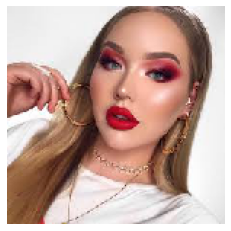

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test39.jpeg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNH6HGboPo1lztb2-vDyhsOfPJpYwzv2Ci8rRGQeIhexytemcd&usqp=CAU")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.00303499]]


array([[0.23859742]], dtype=float32)

90112/85788 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

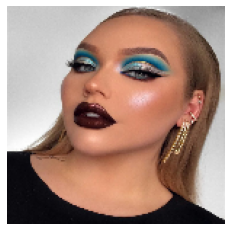

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test42.jpeg",
    "https://66.media.tumblr.com/96d1e17469e72d6dbc27435462447aa2/tumblr_pi7oc0XdGe1ryf50l_540.png")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)
predict_2 = model_2.predict(x_2)
print(predict_2)
predict_2 = model_6.predict(x_2)
predict_2

(150, 150, 3)
(1, 150, 150, 3)
[[0.06124163]]


array([[0.08209754]], dtype=float32)

In [ ]:
model_2 = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dense(5, activation='softmax')
])

model_2.summary()

model_2.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16384512  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 18,643,009
Trainable params: 18,608,897
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
history_2 = model_2.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/10
3/3 [==============================] - 13s 4s/step - loss: 0.4856 - acc: 0.7743 - val_loss: 0.9919 - val_acc: 0.6923
Epoch 2/10
3/3 [==============================] - 12s 4s/step - loss: 0.5550 - acc: 0.7743 - val_loss: 0.8614 - val_acc: 0.6923
Epoch 3/10
3/3 [==============================] - 20s 7s/step - loss: 0.4825 - acc: 0.7920 - val_loss: 1.0312 - val_acc: 0.6923
Epoch 4/10
3/3 [==============================] - 13s 4s/step - loss: 0.4323 - acc: 0.7920 - val_loss: 1.1693 - val_acc: 0.6923
Epoch 5/10
3/3 [==============================] - 13s 4s/step - loss: 0.4652 - acc: 0.8009 - val_loss: 1.0002 - val_acc: 0.6923
Epoch 6/10
3/3 [==============================] - 13s 4s/step - loss: 0.4870 - acc: 0.7920 - val_loss: 1.7533 - val_acc: 0.6923
Epoch 7/10
3/3 [==============================] - 20s 7s/step - loss: 0.5292 - acc: 0.7876 - val_loss: 1.1957 - val_acc: 0.7308
Epoch 8/10
3/3 [==============================] - 20s 7s/step - loss: 0.4642 - acc: 0.7788 - val_loss: 2